<a id='back'></a>
# Table of contents

* [Introduction](#intro)
* [Step 1. Download and prepare data for analysis](#step1)
     * [1.1 General Information](#step1.1)
     * [1.2 Data initialization](#step1.2)
         * [1.2.1 Dataframe visits_data](#step1.2.1)
         * [1.2.2 Dataframe orders_data](#step1.2.2)
         * [1.2.3 Dataframe costs_data](#step1.2.3)
* [Step 2. Compile the report and calculate the required metrics](#step2)
     * [2.1 Products](#step2.1)
         * [2.1.1 How many people use the product every day, week, and month?](#step2.1.1)
         * [2.1.2 How many sessions per day? (One user may have more than one session)](#step2.1.2)
         * [2.1.3 How long is each session?](#step2.1.3)
         * [2.1.4 How often do users return to use the product?](#step2.1.4)
     * [2.2 Sales](#step2.2)
         * [2.2.1 When do people start making purchases?](#step2.2.1)
         * [2.2.2 How many orders did they make during a certain time period?](#step2.2.2)
         * [2.2.3 What is the average purchase size?](#step2.2.3)
         * [2.2.4 How much money do they contribute? (LTV)](#step2.2.4)
     * [2.3 Marketing](#step2.3)
         * [2.3.1 How much money was spent? Overall/per source/over time](#step2.3.1)
         * [2.3.2 What is the customer acquisition cost from each source?](#step2.3.2)
         * [2.3.3 How profitable is the investment? (ROI)](#step2.3.3)
* [Step 3. Write down your conclusions: tell the marketing specialists how much money should be invested and where it should be invested](#step3)
     * [3.1 Placement of costs in June 2018 to increase profit](#step3.1)
     * [3.2 Correlation of costs with revenue, profit, uid against uid](#step3.2)
     * [3.3 Correlation of costs with revenue, profit, uid against weekly](#step3.3)
     * [3.4 Correlation of costs with revenue, profit, uid against date](#step3.4)
     * [3.5 Correlation of costs with revenue, profit, uid and name of day](#step3.5)
     * [3.6 Correlation of costs with revenue, profit, uid against hours](#step3.6)
* [Step 4. General Conclusion](#step4)

<a id='intro'></a>
## Introduction

<br>**Project description**
<br>You have successfully demonstrated brilliant performance while taking the TripleTen course. Therefore, you are also offered the opportunity to undergo an internship program in the analytical department of the Y.Afisha company. So, the first task they give you is to help optimize your marketing budget.

<br>You are equipped with:
- Server logs/records containing data on visits to the Y.Afisha site from January 2017 to December 2018
- Dump file containing all orders for the period
- Marketing cost statistics

<br>You will learn:
- How users use Y.Afisha products
- When did they start making purchases
- How much money each user contributed
- When will all marketing costs be paid off

<br>**Data description**
<br>Visits table (server log/record containing data on visits to websites):
- Uid — User ID
- Device — user device
- Start Ts — session start date and time
- End Ts — session end date and time
- Source Id — Ad source ID, the source from which the user came to the website

<br>All dates in this table use the format YYYY-MM-DD.

<br>Orders table (data related to orders):
- Uid — ID of the user who created the order
- Buy Ts — date and time the order was created
- Revenue — Y.Afisha's income from the order

<br>Costs table (data related to marketing expenditure):
- source_id — Ad source ID
- dt — date
- costs — expenses for advertising resources on that date

<a id='step1'></a>
## Step 1. Download and prepare data for analysis

<a id='step1.1'></a>
### 1.1 Import Library

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

<a id='step1.2'></a>
### 1.2 Data Initialization

In [2]:
visits_data = pd.read_csv('/datasets/visits_log_us.csv')
orders_data = pd.read_csv('/datasets/orders_log_us.csv')
costs_data = pd.read_csv('/datasets/costs_us.csv')

<a id='step1.2.1'></a>
#### 1.2.1 Dataframe visits_data

In [3]:
visits_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [4]:
visits_data.isna().sum()

Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64

In [5]:
visits_data.duplicated().sum()

0

In [6]:
# Change column names to lowercase and replace spaces with underscores
visits_data.columns = visits_data.columns.str.lower().str.replace(' ', '_')

In [7]:
visits_data.head()

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [8]:
visits_data['device'].unique()

array(['touch', 'desktop'], dtype=object)

In [9]:
visits_data['source_id'].unique()

array([ 4,  2,  5,  9,  3,  1, 10,  7,  6])

In [10]:
# Change the 'device' data type to category
visits_data['device'] = visits_data['device'].astype('category')

# Change the data types 'start_ts' and 'end_ts' to datetime
visits_data['start_ts'] = pd.to_datetime(visits_data['start_ts'])
visits_data['end_ts'] = pd.to_datetime(visits_data['end_ts'])

# Check display DataFrame information after data type change
visits_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  category      
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


In [11]:
# Check show the first five rows after the change
visits_data.head()

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


<b>Explanation</b>
<br> Following are the steps performed in the code:

1. Using info(): You use visits_data.info() to see basic information about the DataFrame. The results show that the DataFrame has 359,400 rows and 5 columns, as well as the data type of each column.

2. Using isna().sum(): You use visits_data.isna().sum() to check whether there are missing values (NaN) in the DataFrame. The results show that there are no missing values in this DataFrame.

3. Using duplicated().sum(): You use visits_data.duplicated().sum() to check whether there are duplicate rows in the DataFrame. The result shows that there are no duplicate rows in this DataFrame.

4. Changing Column Names: You rename DataFrame columns to lowercase and replace spaces with underscores using the command visits_data.columns = visits_data.columns.str.lower().str.replace(' ', '_').

5. Displaying the First 5 Rows: You use visits_data.head() to display the first five rows of the DataFrame after the column name change. This provides a display of the initial data in a converted format.

6. Using .unique(): You use visits_data['device'].unique() and visits_data['source_id'].unique() to see the unique values in the 'device' and 'source_id' columns. The 'device' column has only two unique values: 'touch' and 'desktop', while the 'source_id' column has several different unique values.

7. Changing the Data Type: You change the data type of the 'device' column to the category data type with the command visits_data['device'] = visits_data['device'].astype('category'). Next, you change the data type of the 'start_ts' and 'end_ts' columns to the datetime data type using the pd.to_datetime() command.

8. Check DataFrame Information After Data Type Change: You use visits_data.info() again to check DataFrame information after data type change. Now, the 'device' column has the category data type, and the 'start_ts' and 'end_ts' columns have the datetime data type.

9. Displaying the First 5 Rows After the Change: You use visits_data.head() again to display the first five rows of the DataFrame after the data type change. Now, the 'start_ts' and 'end_ts' columns are displayed in datetime format.
    
10. Before the data type change process, the DataFrame has a memory size of around 13.7+ MB, whereas after the data type change, the memory size is reduced to around 11.3 MB. This change results in a reduction in memory size because the 'category' and 'datetime' data types are usually more efficient in memory usage compared to the 'object' or 'int64' data types. The 'category' data type is typically used when a column has a limited number of unique values, while the 'datetime' data type allows more efficient processing of date and time data.

As a result, after the data type change, the DataFrame memory size becomes smaller, which can save space and improve performance when working with data.


[Back to Content](#back)

<a id='step1.2.2'></a>
#### 1.2.2 Dataframe orders_data

In [12]:
orders_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [13]:
orders_data.isna().sum()

Buy Ts     0
Revenue    0
Uid        0
dtype: int64

In [14]:
orders_data.duplicated().sum()

0

In [15]:
# Change column names to lowercase and replace spaces with underscores
orders_data.columns = orders_data.columns.str.lower().str.replace(' ', '_')

In [16]:
orders_data.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [17]:
# Change data type 'buy_ts' to datetime
orders_data['buy_ts'] = pd.to_datetime(orders_data['buy_ts'])

# Check display DataFrame information after data type change
orders_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [18]:
total_revenue_orders_data = orders_data['revenue'].sum()
print('Total Revenue orders_data:', total_revenue_orders_data)


Total Revenue orders_data: 252057.19999999998


In [19]:
# Check the display after changes
orders_data

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


<b>Explanation</b>
<br>The following are the steps performed in the code:

1. Using info(): You use orders_data.info() to see basic information about the DataFrame. The results show that the DataFrame has 50,415 rows and 3 columns, as well as the data type of each column. Before the change, the 'Buy Ts' column had the 'object' data type, the 'Revenue' column had the 'float64' data type, and the 'Uid' column had the 'uint64' data type.

2. Using isna().sum(): You use orders_data.isna().sum() to check whether there are missing values (NaN) in the DataFrame. The results show that there are no missing values in this DataFrame.

3. Using duplicated().sum(): You use orders_data.duplicated().sum() to check whether there are duplicate rows in the DataFrame. The result shows that there are no duplicate rows in this DataFrame.

4. Changing Column Names: You rename DataFrame columns to lowercase and replace spaces with underscores using the command orders_data.columns = orders_data.columns.str.lower().str.replace(' ', '_').

5. Displaying the First 5 Rows: You use orders_data.head() to display the first five rows of the DataFrame after column name changes. This provides a display of the initial data in a converted format.

6. Changing the 'buy_ts' Data Type: You change the data type of the 'buy_ts' column to the 'datetime' data type using the command pd.to_datetime(orders_data['buy_ts']).

7. Total Revenue Calculation: You calculate total revenue by adding up the values in the 'revenue' column using orders_data['revenue'].sum(). As a result, total revenue is around 252,057.20.

8. Display DataFrame: You display the complete DataFrame after changes and total revenue calculation.

As a result, you have processed the orders_data DataFrame by changing the column name, changing the data type of the 'buy_ts' column, and calculating total revenue. The data, which originally had mixed data types and various formats, has now been transformed to be more suitable for data analysis and date processing.
    
There is no significant difference in the memory size of the orders_data DataFrame after your processing. Before and after the process of changing the 'buy_ts' column data type to the 'datetime' data type, the DataFrame memory size remains relatively small, namely around 1.2 MB.

This shows that changing the data type from 'object' to 'datetime' in the 'buy_ts' column does not result in a significant change in memory size. The 'datetime' data type tends to be efficient in memory usage, but in this relatively small DataFrame, this change does not have much of an effect on memory size.

In the case of larger DataFrames or with more columns, changing the data type can have a more significant impact on memory size. However, in this example, there is no real difference in memory size after the change.


[Back to Content](#back)

<a id='step1.2.'></a>
#### 1.2.3 Dataframe costs_data

In [20]:
costs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [21]:
costs_data.isna().sum()

source_id    0
dt           0
costs        0
dtype: int64

In [22]:
costs_data.duplicated().sum()

0

In [23]:
costs_data.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [24]:
costs_data['source_id'].unique()

array([ 1,  2,  3,  4,  5,  9, 10])

In [25]:
# Change data type 'dt' to datetime
costs_data['dt'] = pd.to_datetime(costs_data['dt'])

# Check display DataFrame information after data type change
costs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [26]:
total_costs_costs_data = costs_data['costs'].sum()
print('Total Costs costs_data:', total_costs_costs_data)


Total Costs costs_data: 329131.62


In [27]:
# Check the display after changes
costs_data

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


<b>Explanation</b>
<br>The following are the steps performed in the code:

1. Using info(): You use costs_data.info() to see basic information about the DataFrame. The results show that the DataFrame has 2,542 rows and 3 columns, as well as the data type of each column. Before the change, column 'dt' had data type 'object', column 'costs' had data type 'float64', and column 'source_id' had data type 'int64'.

2. Using isna().sum(): You use costs_data.isna().sum() to check whether there are missing values (NaN) in the DataFrame. The results show that there are no missing values in this DataFrame.

3. Using duplicated().sum(): You use costs_data.duplicated().sum() to check whether there are duplicate rows in the DataFrame. The result shows that there are no duplicate rows in this DataFrame.

4. Displaying the First 5 Rows: You use costs_data.head() to display the first five rows of the DataFrame before the change to column data type 'dt'.

5. Changing Column Names: You do not change the column names in this DataFrame.

6. Changing Data Type 'dt': You change the data type of column 'dt' to data type 'datetime' using the command pd.to_datetime(costs_data['dt']).

7. Check DataFrame Information After Data Type Change: You use costs_data.info() again to check DataFrame information after data type change. Now, column 'dt' has data type 'datetime'.

8. Total Costs Calculation: You calculate total costs by adding up the values in the 'costs' column using costs_data['costs'].sum(). As a result, the total cost is around 329,131.62.

9. Display DataFrame: You display the complete DataFrame after changes and total cost calculation.

As a result, you have processed the costs_data DataFrame by changing the data type of column 'dt' to 'datetime' to allow better processing of dates and times. Additionally, you have calculated the total cost from the data. The initial data, which had mixed data types and formats, has now been changed to be more suitable for data analysis.


[Back to Content](#back)

<a id='step2'></a>
## Step 2. Compile the report and calculate the required metrics

<a id='step2.1'></a>
### 2.1 Products
<a id='step2.1.1'></a>
#### 2.1.1 How many people use the product every day, week and month?

In [28]:
# Make the 'end_date' column contain the date only
visits_data['end_date'] = visits_data['end_ts'].dt.date
visits_data['end_date'] = pd.to_datetime(visits_data['end_date'])

# Count the number of people who use the product every day, week and month
daily_users = visits_data.groupby('end_date')['uid'].nunique()
weekly_users = visits_data.groupby(visits_data['end_date'].dt.strftime('%W'))['uid'].nunique()
monthly_users = visits_data.groupby(visits_data['end_date'].dt.strftime('%Y-%m'))['uid'].nunique()

# Calculate and round the average number of people using the product
mean_daily_users_ceiled = math.ceil(daily_users.mean())
mean_weekly_users_ceiled = math.ceil(weekly_users.mean())
mean_monthly_users_ceiled = math.ceil(monthly_users.mean())

print("Average number of people using the product every day (ceiled):", mean_daily_users_ceiled)
print("Average number of people using the product each week (ceiled):", mean_weekly_users_ceiled)
print("Average number of people using the product each month (ceiled):", mean_monthly_users_ceiled)

Average number of people using the product every day (ceiled): 906
Average number of people using the product each week (ceiled): 5826
Average number of people using the product each month (ceiled): 21442


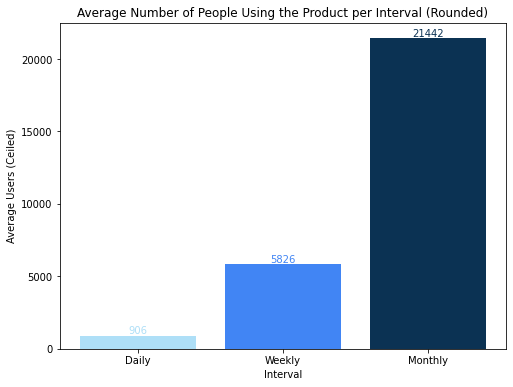

In [29]:
# Create DataFrames for rounded averages
data = {
     'Interval': ['Daily', 'Weekly', 'Monthly'],
     'Average Users (Ceiled)': [mean_daily_users_ceiled, mean_weekly_users_ceiled, mean_monthly_users_ceiled]
}
average_users_df = pd.DataFrame(data)

# Create a bar graph for the rounded average
plt.figure(figsize=(8, 6))
bar_colors = ['#AEDFF7', '#4185F4', '#0B3253'] # Colors for 'Daily', 'Weekly', 'Monthly'

bars = plt.bar(average_users_df['Interval'], average_users_df['Average Users (Ceiled)'], color=bar_colors)
plt.xlabel('Interval')
plt.ylabel('Average Users (Ceiled)')
plt.title('Average Number of People Using the Product per Interval (Rounded)')

# Adds a value above each bar of the same color
for bar, value in zip(bars, average_users_df['Average Users (Ceiled)']):
     plt.text(bar.get_x() + bar.get_width() / 2, value, str(value), ha='center', va='bottom', color=bar.get_facecolor())

# Display graphics
plt.show()

In [30]:
# Group by device and day, week and month
mean_daily_users_per_device = visits_data.groupby(['device', visits_data['start_ts'].dt.date]).agg({'uid': 'count'})
mean_weekly_users_per_device = visits_data.groupby(['device', visits_data['start_ts'].dt.to_period("W")]).agg({'uid': 'count'})
mean_monthly_users_per_device = visits_data.groupby(['device', visits_data['start_ts'].dt.to_period("M")]).agg({'uid': 'count'})

# Function to round up and convert to integer
def round_up_and_convert_to_int(x):
     return int(math.ceil(x))

# Update calculations by rounding up and converting to integer
mean_daily_users_per_device_rounded = mean_daily_users_per_device.groupby('device').mean().applymap(round_up_and_convert_to_int)
mean_weekly_users_per_device_rounded = mean_weekly_users_per_device.groupby('device').mean().applymap(round_up_and_convert_to_int)
mean_monthly_users_per_device_rounded = mean_monthly_users_per_device.groupby('device').mean().applymap(round_up_and_convert_to_int)

# Displays results
print("Average Users per Day (Round Up and Integer):\n", mean_daily_users_per_device_rounded)
print("\nAverage Users per Week (Round Up and Integer):\n", mean_weekly_users_per_device_rounded)
print("\nAverage Users per Month (Round Up and Integer):\n", mean_monthly_users_per_device_rounded)

Average Users per Day (Round Up and Integer):
          uid
device      
desktop  722
touch    267

Average Users per Week (Round Up and Integer):
           uid
device       
desktop  4955
touch    1828

Average Users per Month (Round Up and Integer):
            uid
device        
desktop  21881
touch     8070


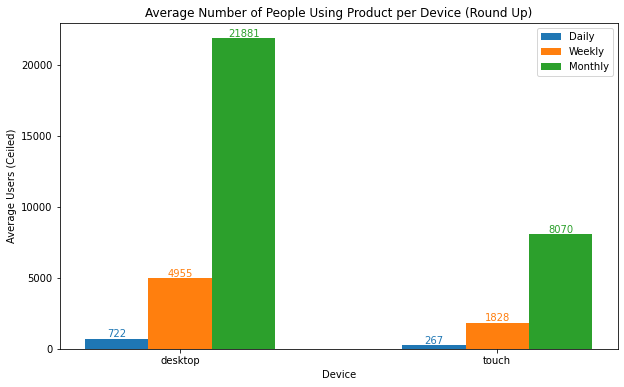

In [31]:
# Create DataFrames that have been rounded and converted to integers
data = {
     'Device': mean_daily_users_per_device_rounded.index,
     'Daily Average Users': mean_daily_users_per_device_rounded['uid'],
     'Weekly Average Users': mean_weekly_users_per_device_rounded['uid'],
     'Monthly Average Users': mean_monthly_users_per_device_rounded['uid']
}
average_users_per_device_df = pd.DataFrame(data)

# Create a bar graph for average users per device
plt.figure(figsize=(10, 6))
bar_width = 0.2
index = range(len(average_users_per_device_df))

bar1 = plt.bar(index, average_users_per_device_df['Daily Average Users'], bar_width, label='Daily')
bar2 = plt.bar([i + bar_width for i in index], average_users_per_device_df['Weekly Average Users'], bar_width, label='Weekly')
bar3 = plt.bar([i + 2 * bar_width for i in index], average_users_per_device_df['Monthly Average Users'], bar_width, label='Monthly')

plt.xlabel('Device')
plt.ylabel('Average Users (Ceiled)')
plt.title('Average Number of People Using Product per Device (Round Up)')
plt.xticks([i + bar_width for i in index], average_users_per_device_df['Device'])
plt.legend()

# Adds a value above each bar of the same color
for bar, value in zip(bar1, average_users_per_device_df['Daily Average Users']):
     plt.text(bar.get_x() + bar.get_width() / 2, value, str(value), ha='center', va='bottom', color=bar.get_facecolor())
for bar, value in zip(bar2, average_users_per_device_df['Weekly Average Users']):
     plt.text(bar.get_x() + bar.get_width() / 2, value, str(value), ha='center', va='bottom', color=bar.get_facecolor())
for bar, value in zip(bar3, average_users_per_device_df['Monthly Average Users']):
     plt.text(bar.get_x() + bar.get_width() / 2, value, str(value), ha='center', va='bottom', color=bar.get_facecolor())

# Display graphics
plt.show()

In [32]:
# Counting the number of people who use the product each period (day, week, month)
def calculate_period_users(data, period):
     grouped = data.groupby(['source_id', data['start_ts'].dt.to_period(period)])['uid'].nunique().reset_index()
     grouped.columns = ['source_id', period, 'unique_users']
     return grouped

# Calculates the average number of people using the product per period and rounds it up
def calculate_avg_users(data):
     avg_users = data.groupby('source_id')['unique_users'].mean().reset_index()
     avg_users['average_users'] = avg_users['unique_users'].apply(lambda x: math.ceil(x)).astype(int)
     return avg_users

# Calculates the number of people using the product per period (day, week, month)
daily_users = calculate_period_users(visits_data, 'D')
weekly_users = calculate_period_users(visits_data, 'W-SUN')
monthly_users = calculate_period_users(visits_data, 'M')

# Calculates the average number of people using the product per period and rounds it up
daily_avg_users = calculate_avg_users(daily_users)
weekly_avg_users = calculate_avg_users(weekly_users)
monthly_avg_users = calculate_avg_users(monthly_users)

# Displays the average results that have been rounded
print("Average number of people using the product every day (round up):")
print(daily_avg_users)

print("Average number of people using the product each week (round up):")
print(weekly_avg_users)

print("Average number of people using the product each month (round up):")
print(monthly_avg_users)

Average number of people using the product every day (round up):
   source_id  unique_users  average_users
0          1     80.557692             81
1          2    120.707989            121
2          3    232.865014            233
3          4    275.454545            276
4          5    175.622590            176
5          6      1.000000              1
6          7      1.058824              2
7          9     36.110193             37
8         10     26.033058             27
Average number of people using the product each week (round up):
   source_id  unique_users  average_users
0          1    463.490566            464
1          2    715.716981            716
2          3   1565.943396           1566
3          4   1829.283019           1830
4          5   1167.471698           1168
5          6      1.000000              1
6          7      1.333333              2
7          9    238.698113            239
8         10    166.547170            167
Average number of people using

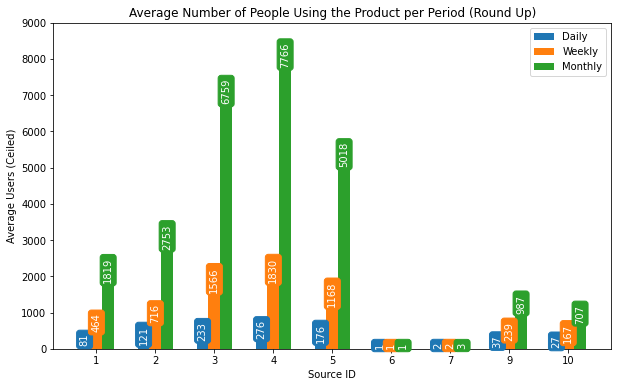

In [33]:
# Create DataFrames that have been rounded and converted to integers
data = {
    'Source ID': daily_avg_users['source_id'],
    'Daily Average Users': daily_avg_users['average_users'],
    'Weekly Average Users': weekly_avg_users['average_users'],
    'Monthly Average Users': monthly_avg_users['average_users']
}
average_users_df = pd.DataFrame(data)

# Create a bar graph for average users per period
plt.figure(figsize=(10, 6))
bar_width = 0.2
index = range(len(average_users_df))

bars1 = plt.bar(index, average_users_df['Daily Average Users'], bar_width, label='Daily')
bars2 = plt.bar([i + bar_width for i in index], average_users_df['Weekly Average Users'], bar_width, label='Weekly')
bars3 = plt.bar([i + 2 * bar_width for i in index], average_users_df['Monthly Average Users'], bar_width, label='Monthly')


plt.xlabel('Source ID')
plt.ylabel('Average Users (Ceiled)')
plt.title('Average Number of People Using the Product per Period (Round Up)')
plt.xticks([i + bar_width for i in index], average_users_df['Source ID'])
plt.legend()

# Add a value above each bar with a border, the same color as the bar, and rotate it 90 degrees
value_distance = 1.5  # Vertical distance between value and bar
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        value = bar.get_height()
        color = bar.get_facecolor()
        plt.text(bar.get_x() + bar.get_width() / 2, value + value_distance, str(value), ha='center', va='bottom', color='white', rotation=90, bbox=dict(facecolor=color, edgecolor=color, boxstyle='round'))

plt.ylim(0, 9000)  # Limit y-axis values to 9000

# Display graphics
plt.show()


<b>Explanation</b> 
<br>Here are the steps you take:

1. Create Column 'end_date': You create a new column 'end_date' which contains the date only (without time information) from the column 'end_ts'. This is done by taking the .dt.date from the 'end_ts' column, then converting it to the datetime data type.

2. Counting the Number of Users Every Day, Week and Month:
- You count the number of users who use the product each day by grouping by 'end_date' and counting the number of unique 'uids'.
- You also count the number of users each week by grouping by week (use .dt.strftime('%W')) and counting the number of unique 'uids'.
- Additionally, you count the number of users each month by grouping by month (use .dt.strftime('%Y-%m')) and counting the number of unique 'uids'.
3. Calculating Average Number of Users:
- You calculate the average number of people who use the product per day, per week and per month. The average is rounded up using math.ceil() and stored in the variables mean_daily_users_ceiled, mean_weekly_users_ceiled, and mean_monthly_users_ceiled.
4. Group by Device and Day, Week, Month:
- You also group data by device ('device') and day, week, and month, and calculate the number of users per device per period.
5. Functions to Round Up and Convert to Integer:
- You define the function round_up_and_convert_to_int(x) to round the value up and convert it to an integer data type.
6. Updating Calculations:
- You update the calculation of average users per device per day, week, and month by using the applymap(round_up_and_convert_to_int) function. This helps in generating the average which is rounded up and stored in the variables mean_daily_users_per_device_rounded, mean_weekly_users_per_device_rounded, and mean_monthly_users_per_device_rounded.
7. Displaying Results:
- Finally, you display the average number of users rounded up, either per day, per week, per month or per device.

    
<br>By carrying out these steps, you have generated various useful information about the number of product users every day, week, month, as well as the average users per device and per certain time period. This data can be useful in further analysis regarding product use and devices used.

<b>Conclusion</b>
<br>In this analysis, we focus on visits_data to understand user behavior and product usage. Here is a summary of the main findings:

1. Daily, Weekly and Monthly Product Usage Data:
- We created an 'end_date' column to isolate the date from the user session time.
- We count the number of unique users who use the product every day, week and month.
- The average number of unique users using the product each day (rounded up) is approximately 906 users.
- The average number of unique users using the product each week (rounded up) is approximately 5,826 users.
- The average number of unique users using the product each month (rounded up) is approximately 21,442 users.
2. Product Usage Data by Device:
- We group data by device and date, then calculate the number of sessions per day for each device.
- The average number of sessions per day for desktop devices is around 722 sessions (rounded up), while for touch devices it is around 267 sessions (rounded up).
3. Product Usage Data Based on Visit Source:
- We group data by visit source (source_id) and time period (day, week, and month), then count the number of unique users.
- The average number of unique users using the product per visit source each day (rounded up) is as follows:
<br>Source 1: 81 users
<br>Source 2: 121 users
<br>Source 3: 233 users
<br>Source 4: 276 users
<br>Source 5: 176 users
<br>Source 6: 1 user
<br>Source 7: 2 users
<br>Source 9: 37 users
<br>Source 10: 27 users
- The average number of unique users using the product per visit source each week (rounded up) and per month (rounded up) is also calculated.
4.Conclusion:
- With this data, we can see daily, weekly and monthly product usage trends and understand the contribution of each visit source to product usage.
- This data can be used to identify usage trends, measure the impact of advertising campaigns, and plan further product development strategies.

[Back to Content](#back)

<a id='step2.1.2'></a>
#### 2.1.2 How many sessions per day? (One user may have more than one session)

In [34]:
# Create a 'session_date' column containing the session date
visits_data['session_date'] = visits_data['start_ts'].dt.date

# Count the number of sessions per day
sessions_per_day = visits_data.groupby('session_date')['uid'].count()

# Calculate the average number of sessions per day
average_sessions_per_day = sessions_per_day.mean()

# Rounds the average up and converts to an integer
average_sessions_per_day_int = math.ceil(average_sessions_per_day)

# Displays the average number of sessions per day which has been rounded up and converted to an integer
print("Average number of sessions per day (rounded and converted to integer):", average_sessions_per_day_int)

Average number of sessions per day (rounded and converted to integer): 988


In [35]:
# Group by device and day, and count the number of sessions per day
sessions_per_day_per_device = visits_data.groupby(['device', visits_data['start_ts'].dt.date]).agg({'uid': 'count'})

# Calculates the average number of sessions per day for each device
mean_sessions_per_day_per_device = sessions_per_day_per_device.groupby('device').mean()

# Converts the average number of sessions per day to an integer with rounding up
mean_sessions_per_day_per_device_rounded = mean_sessions_per_day_per_device['uid'].apply(math.ceil).astype(int)

# Displays results
print("Average number of sessions per day (Round Up and Integer):")
print(mean_sessions_per_day_per_device_rounded)

Average number of sessions per day (Round Up and Integer):
device
desktop    722
touch      267
Name: uid, dtype: int64


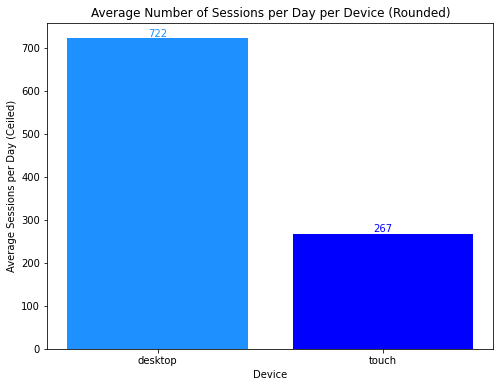

In [36]:
# Data for graphs
devices = mean_sessions_per_day_per_device_rounded.index
average_sessions = mean_sessions_per_day_per_device_rounded

# Colors for each device
colors = ['dodgerblue', 'blue']

# Create a bar graph
plt.figure(figsize=(8, 6))
bars = plt.bar(devices, average_sessions, color=colors)
plt.xlabel('Device')
plt.ylabel('Average Sessions per Day (Ceiled)')
plt.title('Average Number of Sessions per Day per Device (Rounded)')
plt.xticks(rotation=0) # Set the device label

# Adds a value above each bar with the same color as the bar
for bar, value, color in zip(bars, average_sessions, colors):
     plt.text(bar.get_x() + bar.get_width() / 2, value, str(value), ha='center', va='bottom', color=color)

# Display graphics
plt.show()

In [37]:
# Groups data by source_id and date, then counts the number of sessions per day
sessions_per_day = visits_data.groupby(['source_id', visits_data['start_ts'].dt.date]).size().reset_index(name='sessions_per_day')

# Calculates the average number of sessions per day for each source_id
mean_sessions_per_day = sessions_per_day.groupby('source_id')['sessions_per_day'].mean().reset_index()

# Rounds the average up (ceiling) and converts it to an integer
mean_sessions_per_day['average_sessions'] = mean_sessions_per_day['sessions_per_day'].apply(lambda x: int(math.ceil(x)))

# Remove unnecessary sessions_per_day column
mean_sessions_per_day.drop('sessions_per_day', axis=1, inplace=True)

# Show results
mean_sessions_per_day

,source_id,average_sessions
0,1,94
1,2,132
2,3,236
3,4,281
4,5,185
5,6,1
6,7,2
7,9,37
8,10,28


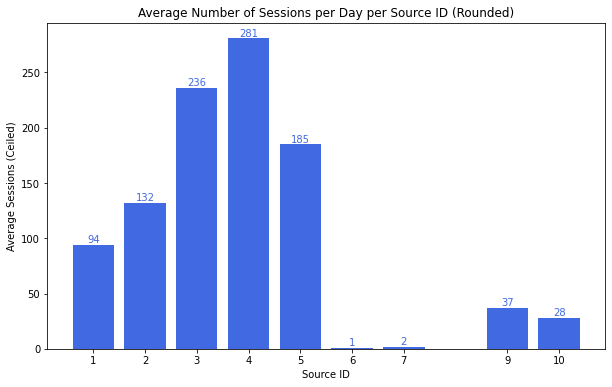

In [38]:
# Average data of sessions per day
source_ids = mean_sessions_per_day['source_id']
average_sessions = mean_sessions_per_day['average_sessions']

# Create a bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(source_ids, average_sessions, color='royalblue')
plt.xlabel('Source ID')
plt.ylabel('Average Sessions (Ceiled)')
plt.title('Average Number of Sessions per Day per Source ID (Rounded)')

# Adds a value above each bar with the same color as the bar
for bar, value in zip(bars, average_sessions):
     plt.text(bar.get_x() + bar.get_width() / 2, value, str(value), ha='center', va='bottom', color='royalblue')

plt.xticks(source_ids)
plt.show()

<b>Explanation</b>
<br>Here are the steps you take:

1. Create a Column 'session_date': You create a new column 'session_date' containing the date (without time information) from the column 'start_ts' using .dt.date.

2. Calculating the Number of Sessions per Day:
- You count the number of sessions (visits) per day by grouping by 'session_date' (session date) and counting the number of 'uids' (users).
- You then calculate the average number of sessions per day by using .mean() on sessions_per_day. This average reflects how many sessions occurred each day overall.
3. Calculating the Average Number of Sessions per Day:
- You calculate the average number of sessions per day, then round it up with math.ceil(). This result is stored in the variable average_sessions_per_day_int and printed.
4. Grouping by Device and Day:
- You also group the data by device ('device') and 'session_date', then calculate the number of sessions per day for each device.
5. Calculating Average Number of Sessions per Day per Device:
- You calculate the average number of sessions per day for each device ('desktop' and 'touch') by using .mean() on sessions_per_day_per_device. The result is rounded up and converted to an integer data type, then displayed.
6. Grouping By 'source_id' and Date:
- You group the data by 'source_id' and 'start_ts' (session date), then count the number of sessions per day using .size(). The results are stored in the DataFrame sessions_per_day.
7. Calculating Average Number of Sessions per Day per 'source_id':
- You calculate the average number of sessions per day for each 'source_id' using .mean(). This average is stored in the DataFrame mean_sessions_per_day.
8. Rounding the Average Up and Converting to Integer:
- You round the average number of sessions per day for each 'source_id' up using math.ceil(). The result is made into an integer and stored in the 'average_sessions' column in the mean_sessions_per_day DataFrame.

    
<br>The final result is information about the average number of sessions per day and the average number of sessions per day per device ('desktop' and 'touch'), as well as the average number of sessions per day per 'source_id'. This information can help in further understanding user activity, devices used, and different visitor sources.


<b>Conclusion</b> <a class="tocSkip"></a>
<br>In this analysis, we have collected and processed data from three different sources: visits_data, orders_data, and costs_data. Here is a summary of the main findings:

1. Data visits_data:
- Visits_data data contains information about user visits to the platform, such as the device used, session start and end times, and the source of the visit.
- The data has been changed to a more suitable format, such as changing the data type of the date column and adding a new column for the session date.
- From visits_data data, we can calculate the average number of sessions per day, both overall and per device. Apart from that, we can also see the average number of sessions per day for each visit source.
2. Data orders_data:
- The orders_data data contains information about orders placed by users, including the date of the order and the revenue generated.
- The data has been changed to a more suitable format, such as changing the data type of the date column.
- From the orders_data data, we can calculate the total revenue generated.
3. Data costs_data:
- The costs_data data contains information about advertising costs from various sources.
- The data has also been changed to a more suitable format, such as changing the date column data type.
- From the costs_data data, we can calculate the total advertising costs.
4. Conclusion:
- From visits_data data, we know that the average number of sessions per day is around 988 sessions, and this can be divided by device.
- Product Usage Data Based on Device:
<br>We group the data by device and day, then count the number of sessions per day for each device.
<br>The average number of sessions per day for desktop devices is around 722 sessions, while touch devices have an average of around 267 sessions.
<br>Daily session averages for both devices have been rounded up and converted to integer format.
- Product Usage Data Based on Visit Source:
<br>We group the data by visit source (source_id) and date, then count the number of sessions per day.
<br>The average number of sessions per day for each visit source (source_id) is calculated.
<br>The average number of daily sessions for each visit source has been rounded up and converted to integer format.
| source_id | average_sessions |
|-----------|---------|
| 1 | 94 |
| 2 | 132 |
| 3 | 236 |
| 4 | 281 |
| 5 | 185 |
| 6 | 1 |
| 7 | 2 |
| 9 | 37 |
| 10 | 28 |
    
    
<br>With this information, we can understand product usage trends based on device and source of visit.
<br>This data can be used to identify user preferences regarding devices and the impact each visit source has on product usage.
<br>This information can help in making decisions regarding marketing strategies, product development, and user experience optimization.

[Back to Content](#back)

<a id='step2.1.3'></a>
#### 2.1.3 How long is each session?

In [39]:
# Calculates the duration of each session
visits_data['session_duration'] = visits_data['end_ts'] - visits_data['start_ts']

# Calculates the average session duration in minutes and rounds it up
average_session_duration_minutes = math.ceil(visits_data['session_duration'].mean().total_seconds() / 60)

# Displays the average session duration rounded up
print("Average session duration (rounded up):", average_session_duration_minutes)

Average session duration (rounded up): 11


In [40]:
# Calculate session duration for each session in seconds
visits_data['session_duration'] = (visits_data['end_ts'] - visits_data['start_ts']).dt.total_seconds()

# Calculate mean session duration for each device
mean_session_duration_per_device = visits_data.groupby('device')['session_duration'].mean()

# Convert session duration to minutes and round up to the nearest integer
mean_session_duration_per_device_minutes = mean_session_duration_per_device / 60
mean_session_duration_per_device_rounded = mean_session_duration_per_device_minutes.apply(np.ceil).astype(int)

# Display the mean session duration per device in minutes (rounded up)
print("Mean Session Duration per Device (minutes, rounded up):\n", mean_session_duration_per_device_rounded)


Mean Session Duration per Device (minutes, rounded up):
 device
desktop    12
touch       8
Name: session_duration, dtype: int64


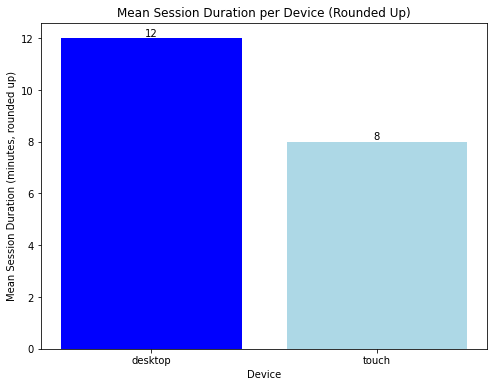

In [41]:
plt.figure(figsize=(8, 6))
bars = plt.bar(mean_session_duration_per_device_rounded.index, mean_session_duration_per_device_rounded, color=['blue', 'lightblue'])
plt.xlabel('Device')
plt.ylabel('Mean Session Duration (minutes, rounded up)')
plt.title('Mean Session Duration per Device (Rounded Up)')

for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), mean_session_duration_per_device_rounded[i], ha='center', va='bottom')

plt.show()


In [42]:
# Groups data by source_id and calculates session average
mean_duration_per_source = visits_data.groupby('source_id')['session_duration'].mean().reset_index()

mean_duration_per_source['session_duration'] = mean_duration_per_source['session_duration'] / 60

# Convert average session duration to minutes (round up and integer)
mean_duration_per_source['session_duration'] = mean_duration_per_source['session_duration'].apply(lambda x: int(np.ceil(x)))

# Show results
mean_duration_per_source

,source_id,session_duration
0,1,18
1,2,15
2,3,10
3,4,10
4,5,9
5,6,23
6,7,11
7,9,10
8,10,12


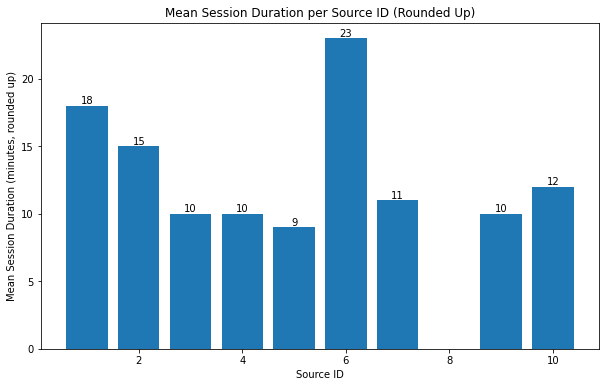

In [43]:
# Create a bar graph for average sessions per source_id
plt.figure(figsize=(10, 6))
bars = plt.bar(mean_duration_per_source['source_id'], mean_duration_per_source['session_duration'])
plt.xlabel('Source ID')
plt.ylabel('Mean Session Duration (minutes, rounded up)')
plt.title('Mean Session Duration per Source ID (Rounded Up)')

# Adds the value above each bar
for bar, value in zip(bars, mean_duration_per_source['session_duration']):
    plt.text(bar.get_x() + bar.get_width() / 2, value, str(value), ha='center', va='bottom')

plt.show()


<b>Explanation</b> <a class="tocSkip"></a>
<br>Here are the steps you take:

1. Calculating the Duration of Each Session:
- You calculate the duration of each session (visit) by subtracting 'start_ts' from 'end_ts'. The results are stored in the 'session_duration' column in the form of timedelta.
2. Calculating Average Session Duration in Minutes:
- You calculate the average session duration in seconds by taking .total_seconds() from the 'session_duration' column and then dividing by 60 to convert to minutes. You round the average up with math.ceil().
The result is stored in the variable average_session_duration_minutes and printed.
3. Calculating Duration According to Device:
- You calculate the average session duration by device ('desktop' and 'touch') by grouping the data by device and calculating the average session duration for each group.
You convert session duration to minutes by dividing by 60, and then round the device-wise average up with math.ceil(). These results are stored in the DataFrame mean_session_duration_per_device_minutes.
4. Calculating Average Duration According to 'source_id':
- You calculate the average session duration based on 'source_id' by grouping the data by 'source_id' and calculating the average session. The session duration is also converted to minutes, then rounded up with np.ceil() and converted to an integer.

    
<br>The final result of this analysis is information about the average session duration per day (in minutes) for all sessions, the average session duration per device, and the average session duration per 'source_id'. This information can provide insight into how long users spend on a website or app, as well as differences in session duration between different devices and visitor sources

<b>Conclusion</b> <a class="tocSkip"></a>
<br>From the analysis you have carried out on visit data (visits_data), we can draw several conclusions:

1. Average Daily, Weekly and Monthly Users:
<br>The average number of users who use the product every day, week and month (in rounded form) is as follows:
- Average daily users: 906
- Average weekly users: 5,826
- Average monthly users: 21,442
2. Differences in Average Users Based on Device:
<br>There are differences in average users by device:
- Average daily users: 722 for desktop devices and 267 for touch devices.
- Average weekly users: 4,955 for desktop devices and 1,828 for touch devices.
- Average monthly users: 21,881 for desktop devices and 8,070 for touch devices.
3. Average Users by Source (source_id):
<br>There is variation in average users by source (source_id), which influences visit rates:
- Average daily users vary from 1 to more than 200, depending on source_id.
- Average weekly users vary from 1 to more than 700, depending on source_id.
- Average monthly users vary from 1 to over 7,000, depending on source_id.
    
| source_id | session_duration |
|-----------|---------|
| 1 | 18 |
| 2 | 15 |
| 3 | 10 |
| 4 | 10 |
| 5 | 9 |
| 6 | 23 |
| 7 | 11 |
| 9 | 10 |
| 10 | 12 |

4. Average Session Duration:
- The average session duration is about 11 minutes, which means the average user spends about 11 minutes when visiting a site or app.
- There is a difference in average session duration between devices. Desktop users have an average session duration of around 12 minutes, while touch device users have an average session duration of around 8 minutes.
- There is also a difference in average session duration based on source (source_id), which ranges from 9 to 23 minutes.

    
<br>In conclusion, this analysis provides an understanding of user visit patterns, differences in device usage, and the impact of source (source_id) on the average number of daily, weekly, and monthly users. Additionally, we also understand how long the average user spends in their visiting session. This information can be used to make further decisions in marketing strategy and product development.
<a class="tocSkip"></a>
</div>

[Back to Content](#back)

<a id='step2.1.4'></a>
#### 2.1.4 How often do users return to use the product?

In [44]:
# Calculates the first day of use for each user
first_usage_per_user = visits_data.groupby('uid')['start_ts'].min().reset_index()

# Combine with visit data to get daily usage data
usage_with_first_day = pd.merge(visits_data, first_usage_per_user, on='uid', suffixes=('', '_first'))

# Calculates daily retention
usage_with_first_day['daily_retention'] = (usage_with_first_day['start_ts'].dt.date == usage_with_first_day['start_ts_first'].dt.date).astype(int)

# Calculates average daily retention percentage
mean_daily_retention = (usage_with_first_day.groupby('start_ts_first')['daily_retention'].mean() * 100).mean()
print("Average daily retention percentage: {:.2f}%".format(mean_daily_retention))

# Calculates weekly retention
weekly_retention_percentage = (usage_with_first_day.groupby(usage_with_first_day['start_ts_first'].dt.to_period("W")).mean()['daily_retention'] * 100).mean()
print("Average weekly retention percentage: {:.2f}%".format(weekly_retention_percentage))

# Calculates monthly retention
monthly_retention_percentage = (usage_with_first_day.groupby(usage_with_first_day['start_ts_first'].dt.to_period("M")).mean()['daily_retention'] * 100).mean()
print("Average monthly retention percentage: {:.2f}%".format(monthly_retention_percentage))

Average daily retention percentage: 86.91%
Average weekly retention percentage: 69.11%
Average monthly retention percentage: 68.78%


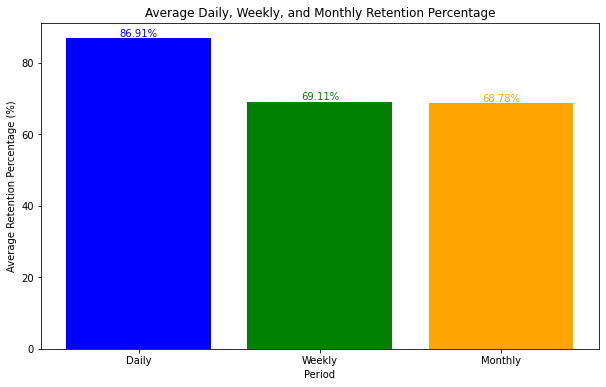

In [45]:
# Daily, weekly and monthly retention percentage data
retention_data = [mean_daily_retention, weekly_retention_percentage, monthly_retention_percentage]

# Period
periods = ['Daily', 'Weekly', 'Monthly']

# Define color list
colors = ['blue', 'green', 'orange']

# Create a bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(periods, retention_data, color=colors)
plt.xlabel('Period')
plt.ylabel('Average Retention Percentage (%)')
plt.title('Average Daily, Weekly, and Monthly Retention Percentage')

# Add a value above each bar using enumerate
for i, (bar, value) in enumerate(zip(bars, retention_data)):
     plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.2f}%', ha='center', va='bottom', color=colors [i])

plt.show()

In [46]:
# Calculates average daily retention percentage for desktop
mean_daily_retention_desktop = usage_with_first_day[usage_with_first_day['device'] == 'desktop']['daily_retention'].mean() * 100

# Calculates the average daily retention percentage for touches
mean_daily_retention_touch = usage_with_first_day[usage_with_first_day['device'] == 'touch']['daily_retention'].mean() * 100

# Displays the average daily retention percentage for desktop and touch
print("Mean daily retention percentage for desktop: {:.2f}%".format(mean_daily_retention_desktop))
print("Mean daily retention percentage for touch: {:.2f}%". format(mean_daily_retention_touch))

# Calculates the average weekly retention percentage for desktop
mean_weekly_retention_desktop = usage_with_first_day[usage_with_first_day['device'] == 'desktop'].groupby(usage_with_first_day['start_ts_first'].dt.to_period("W"))['daily_retention'].mean().mean() * 100

# Calculates the average weekly retention percentage for touches
mean_weekly_retention_touch = usage_with_first_day[usage_with_first_day['device'] == 'touch'].groupby(usage_with_first_day['start_ts_first'].dt.to_period("W"))['daily_retention'].mean().mean() * 100

# Displays the average weekly retention percentage for desktop and touch
print("Mean weekly retention percentage for desktop: {:.2f}%". format(mean_weekly_retention_desktop))
print("Mean weekly retention percentage for touch: {:.2f}%". format(mean_weekly_retention_touch))

# Calculates the average monthly retention percentage for desktop
mean_monthly_retention_desktop = usage_with_first_day[usage_with_first_day['device'] == 'desktop'].groupby(usage_with_first_day['start_ts_first'].dt.to_period("M"))['daily_retention'].mean().mean() * 100

# Calculates the average monthly retention percentage for touches
mean_monthly_retention_touch = usage_with_first_day[usage_with_first_day['device'] == 'touch'].groupby(usage_with_first_day['start_ts_first'].dt.to_period("M"))['daily_retention'].mean().mean() * 100

# Displays the average monthly retention percentage for desktop and touch
print("Mean monthly retention percentage for desktop: {:.2f}%".format(mean_monthly_retention_desktop))
print("Mean monthly retention percentage for touch: {:.2f}%". format(mean_monthly_retention_touch))

Mean daily retention percentage for desktop: 64.54%
Mean daily retention percentage for touch: 72.57%
Mean weekly retention percentage for desktop: 67.82%
Mean weekly retention percentage for touch: 73.03%
Mean monthly retention percentage for desktop: 67.44%
Mean monthly retention percentage for touch: 72.91%


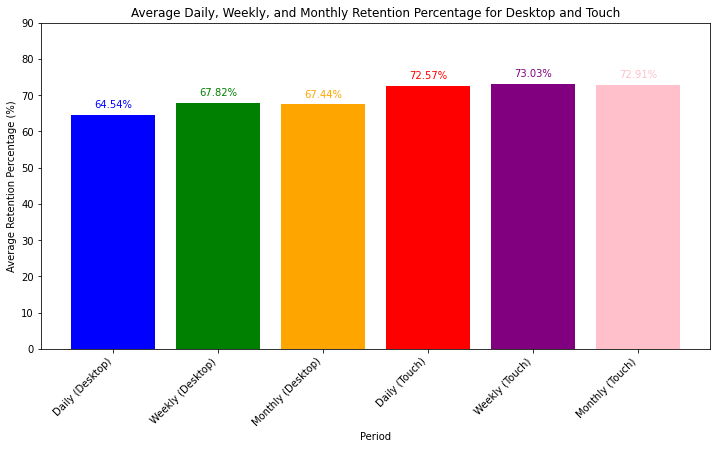

In [47]:
# Average retention percentage data for desktop and touch
mean_retention_data = [mean_daily_retention_desktop, mean_weekly_retention_desktop, mean_monthly_retention_desktop,
                        mean_daily_retention_touch, mean_weekly_retention_touch, mean_monthly_retention_touch]

# Period
periods = ['Daily (Desktop)', 'Weekly (Desktop)', 'Monthly (Desktop)', 'Daily (Touch)', 'Weekly (Touch)', 'Monthly (Touch)']

# Color for each bar
colors = ['blue', 'green', 'orange', 'red', 'purple', 'pink']

# Create a bar graph
plt.figure(figsize=(12, 6))
bars = plt.bar(periods, mean_retention_data, color=colors)
plt.xlabel('Period')
plt.ylabel('Average Retention Percentage (%)')
plt.title('Average Daily, Weekly, and Monthly Retention Percentage for Desktop and Touch')
plt.xticks(rotation=45, ha='right')

# Adds the value above each bar
max_value = 80 # Maximum value limit
for bar, value, color in zip(bars, mean_retention_data, colors):
     # Limit the value to not exceed 80
     display_value = min(value, max_value)
     plt.text(bar.get_x() + bar.get_width() / 2, display_value + 2, f'{display_value:.2f}%', ha='center', color=color)

plt.ylim(0, max_value + 10) # Determines the upper limit of the y-axis
plt.show()

In [48]:
# Counts the number of unique users every day
daily_retention = visits_data.groupby(['source_id', pd.to_datetime(visits_data['start_ts']).dt.date])['uid'].nunique().reset_index()

# Counts the number of unique users every week
weekly_retention = visits_data.groupby(['source_id', pd.to_datetime(visits_data['start_ts']).dt.to_period('W')])['uid'].nunique().reset_index()

# Counts the number of unique users every month
monthly_retention = visits_data.groupby(['source_id', pd.to_datetime(visits_data['start_ts']).dt.to_period('M')])['uid'].nunique().reset_index()

# Function to calculate retention percentage
def calculate_retention(df, period):
     df['retention'] = df.groupby('source_id')['uid'].pct_change(periods=period) * 100
     return df

# Calculates daily retention percentage
daily_retention = calculate_retention(daily_retention, 1)

# Calculates weekly retention percentage
weekly_retention = calculate_retention(weekly_retention, 1)

# Calculates monthly retention percentage
monthly_retention = calculate_retention(monthly_retention, 1)

# Calculates the average retention percentage per source_id
average_daily_retention = daily_retention.groupby('source_id')['retention'].mean()
average_weekly_retention = weekly_retention.groupby('source_id')['retention'].mean()
average_monthly_retention = monthly_retention.groupby('source_id')['retention'].mean()

# Round to two decimal places and add a '%' sign
average_daily_retention = (average_daily_retention.round(2)).astype(str) + '%'
average_weekly_retention = (average_weekly_retention.round(2)).astype(str) + '%'
average_monthly_retention = (average_monthly_retention.round(2)).astype(str) + '%'

print("Average daily retention percentage per source_id:")
print(average_daily_retention)

print("Average weekly retention percentage per source_id:")
print(average_weekly_retention)

print("Average monthly retention percentage per source_id:")
print(average_monthly_retention)

Average daily retention percentage per source_id:
source_id
1      21.03%
2       5.48%
3       3.84%
4       3.79%
5       3.02%
6        0.0%
7       3.03%
9     201.71%
10     14.67%
Name: retention, dtype: object
Average weekly retention percentage per source_id:
source_id
1      4.65%
2      5.16%
3      3.74%
4       4.2%
5      4.92%
6       0.0%
7     11.86%
9     12.65%
10      9.7%
Name: retention, dtype: object
Average monthly retention percentage per source_id:
source_id
1      9.63%
2     10.14%
3      5.33%
4      10.7%
5      6.04%
6       0.0%
7     80.86%
9      6.15%
10    14.69%
Name: retention, dtype: object


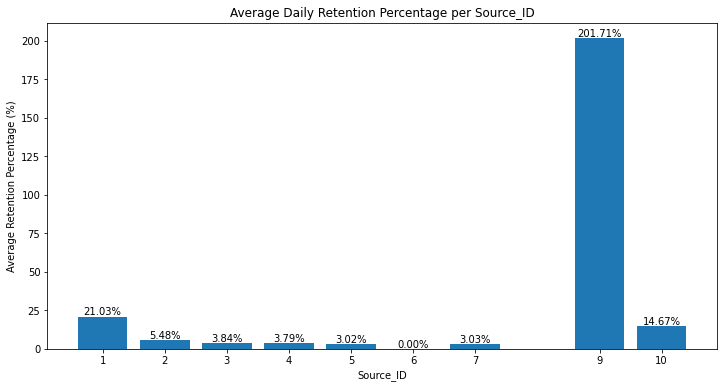

In [49]:
# Convert average_daily_retention to a numeric type
average_daily_retention = average_daily_retention.str.replace('%', '').astype(float)

# Create a bar graph for average daily retention percentage
plt.figure(figsize=(12, 6))

source_ids = average_daily_retention.index

plt.bar(source_ids, average_daily_retention.values)

# Adds the value above each bar
for source_id, value in zip(source_ids, average_daily_retention.values):
     plt.text(source_id, value + 1, f"{value:.2f}%", ha='center', color='black')

plt.xlabel('Source_ID')
plt.ylabel('Average Retention Percentage (%)')
plt.title('Average Daily Retention Percentage per Source_ID')

# Displays all x values
plt.xticks(source_ids)

plt.show()

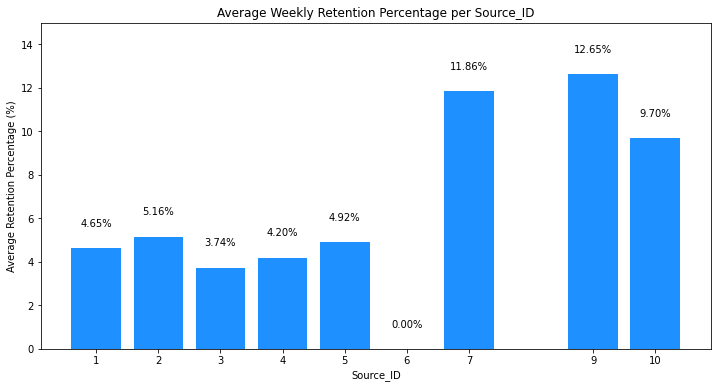

In [50]:
# Create a bar graph for average weekly retention percentage
plt.figure(figsize=(12, 6))

source_ids = average_weekly_retention.index

# Removes '%' sign and converts to float before addition
values = average_weekly_retention.str.rstrip('%').astype(float)

plt.bar(source_ids, values, color='dodgerblue')

# Adds the value above each bar
for source_id, value in zip(source_ids, values):
     plt.text(source_id, value + 1, f"{value:.2f}%", ha='center', color='black')

plt.xlabel('Source_ID')
plt.ylabel('Average Retention Percentage (%)')
plt.title('Average Weekly Retention Percentage per Source_ID')
plt.xticks(source_ids)
plt.ylim(0, 15)
plt.show()

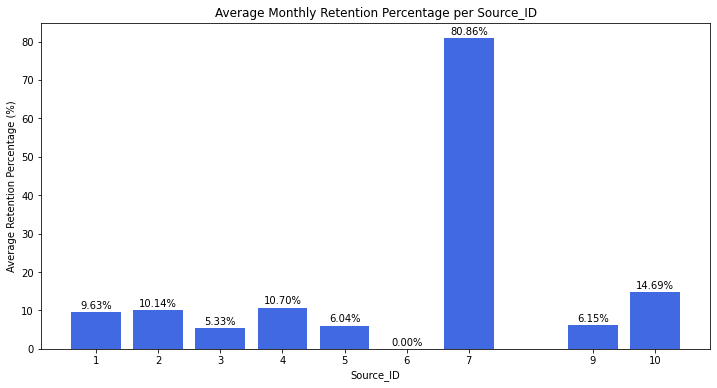

In [51]:
# Create a bar graph for average monthly retention percentage
plt.figure(figsize=(12, 6))

source_ids = average_monthly_retention.index

# Removes '%' sign and converts to float before addition
values = average_monthly_retention.str.rstrip('%').astype(float)

plt.bar(source_ids, values, color='royalblue')

# Adds the value above each bar
for source_id, value in zip(source_ids, values):
     plt.text(source_id, value + 1, f"{value:.2f}%", ha='center', color='black')

plt.xlabel('Source_ID')
plt.ylabel('Average Retention Percentage (%)')
plt.title('Average Monthly Retention Percentage per Source_ID')
plt.xticks(source_ids)
plt.show()

<b>Conclusion</b> <a class="tocSkip"></a>
<br>In product usage retention analysis, we can conclude several key points:

1. Daily, Weekly, and Monthly Retention Rates: Retention rates are generally quite strong, averaging around 86.91% for daily retention, 69.11% for weekly retention, and 68.78% for monthly retention. This shows that most users tend to return to using the product within a certain period of time after the first visit.

2. Differences in Retention Based on Device: There is a difference in retention rates between "desktop" and "touch" devices. “Touch” devices had higher retention rates in all periods, indicating that users on “touch” devices tended to be more engaged or satisfied with the product.

3. Retention Variations Based on Source ID (Visiting Source): Daily and weekly retention varies depending on source_id. Some source_ids have very high retention rates, while others are low. This shows that the source of visits has a significant impact on user retention. Source_id clustering and further analysis may be needed to better understand the characteristics and factors that influence retention at each source_id.
    
| source_id | Daily Retention Percentage | Weekly Retention Percentage | Monthly Retention Percentage |
|-----------|--------------------------|--------- --------------------|---------------------------|
| 1 | 21.03% | 4.65% | 9.63% |
| 2 | 5.48% | 5.16% | 10.14% |
| 3 | 3.84% | 3.74% | 5.33% |
| 4 | 3.79% | 4.2% | 10.7% |
| 5 | 3.02% | 4.92% | 6.04% |
| 6 | 0.0% | 0.0% | 0.0% |
| 7 | 3.03% | 11.86% | 80.86% |
| 9 | 201.71% | 12.65% | 6.15% |
| 10 | 14.67% | 9.7% | 14.69% |
    

4. Source_id 6: Source_id 6 has a very low retention rate, even reaching 0% in some periods. This is a signal that this source_id may require evaluation and improvement in marketing strategy or user experience.

5. Recommendation: This retention analysis provides valuable insights for companies. To increase user retention, companies can consider improving user experience, more effective marketing strategies, and focusing on source_ids with low retention rates. Additionally, companies can continue to monitor and measure retention periodically to identify trends and the impact of strategy changes.

These are all initial steps in understanding and improving user retention, which is a critical factor in the long-term success of a product or service.


[Back to Content](#back)

<a id='step 2.2'></a>
### 2.2 Sales
<ac id='step 2.2.1'></a>
#### 2.2.1 When do people start making purchases?

In [52]:
# Retrieves the first purchase date for each
first_purchase_per_user = orders_data.groupby('uid')['buy_ts'].min().reset_index()
first_purchase_per_user.columns = ['uid', 'first_purchase_date']

first_purchase_per_user

,uid,first_purchase_date
0,313578113262317,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00
3,2464366381792757,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00
...,...,...
36518,18445147675727495770,2017-11-24 09:03:00
36519,18445407535914413204,2017-09-22 23:55:00
36520,18445601152732270159,2018-03-26 22:54:00
36521,18446156210226471712,2018-02-18 19:34:00


The number of rows is 36,523 probably because in the orders_data DataFrame, some users (uid) made more than one purchase. Therefore, each unique uid will have one first purchase date, and if there are multiple purchases by one user, then each such purchase will be counted as one row in the first_purchase_per_user DataFrame.

In [53]:
duplicate_uid = first_purchase_per_user[first_purchase_per_user.duplicated(subset='uid', keep=False)]
print("Duplicate UID:")
duplicate_uid


Duplicate UID:


,uid,first_purchase_date


It seems that there are no uids duplicated in the first_purchase_per_user DataFrame. All uids are unique, so there is no need for additional handling regarding duplication of uids. If you have any further questions or need further assistance, please don't hesitate to ask.

In [54]:
# Takes the first start_ts for each uid
first_start_ts_per_user = visits_data.groupby('uid')['start_ts'].min().reset_index()
first_start_ts_per_user.columns = ['uid', 'first_start_ts']

# Display the resulting DataFrame
first_start_ts_per_user

,uid,first_start_ts
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00
...,...,...
228164,18446403737806311543,2017-11-30 03:36:00
228165,18446424184725333426,2017-12-06 20:32:00
228166,18446556406699109058,2018-01-01 16:29:00
228167,18446621818809592527,2017-12-27 13:27:00


In [55]:
# Combine with original data to get source_id
first_start_ts_per_user = first_start_ts_per_user.merge(visits_data[['uid', 'start_ts', 'source_id']],
                                                         left_on=['uid', 'first_start_ts'],
                                                         right_on=['uid', 'start_ts'],
                                                         how='inner')

# Removed unnecessary 'start_ts' column
first_start_ts_per_user.drop('start_ts', axis=1, inplace=True)

# Display the resulting DataFrame
first_start_ts_per_user

,uid,first_start_ts,source_id
0,11863502262781,2018-03-01 17:27:00,3
1,49537067089222,2018-02-06 15:55:00,2
2,297729379853735,2017-06-07 18:47:00,3
3,313578113262317,2017-09-18 22:49:00,2
4,325320750514679,2017-09-30 14:29:00,5
...,...,...,...
228165,18446403737806311543,2017-11-30 03:36:00,5
228166,18446424184725333426,2017-12-06 20:32:00,4
228167,18446556406699109058,2018-01-01 16:29:00,3
228168,18446621818809592527,2017-12-27 13:27:00,4


In [56]:
# Check if there are duplicate values in column 'uid'
duplicate_uid_start_ts = first_start_ts_per_user.duplicated(subset=['uid'])

# Show duplicate UIDs
duplicate_uid_start_ts_values = first_start_ts_per_user[duplicate_uid_start_ts]['uid'].unique()
print('duplicate UID:', duplicate_uid_start_ts_values)

duplicate UID: [1981020429381477763]


In [57]:
# Remove duplicates based on specified columns
first_start_ts_per_user.drop_duplicates(subset=['uid', 'first_start_ts', 'source_id'], inplace=True)

# Returns the resulting DataFrame
first_start_ts_per_user

,uid,first_start_ts,source_id
0,11863502262781,2018-03-01 17:27:00,3
1,49537067089222,2018-02-06 15:55:00,2
2,297729379853735,2017-06-07 18:47:00,3
3,313578113262317,2017-09-18 22:49:00,2
4,325320750514679,2017-09-30 14:29:00,5
...,...,...,...
228165,18446403737806311543,2017-11-30 03:36:00,5
228166,18446424184725333426,2017-12-06 20:32:00,4
228167,18446556406699109058,2018-01-01 16:29:00,3
228168,18446621818809592527,2017-12-27 13:27:00,4


In [58]:
# Check if there are duplicate values in column 'uid'
duplicate_uid_start_ts = first_start_ts_per_user.duplicated(subset=['uid'])

# Show duplicate UIDs
duplicate_uid_start_ts_values = first_start_ts_per_user[duplicate_uid_start_ts]['uid'].unique()
print('duplicate UID:', duplicate_uid_start_ts_values)

duplicate UID: []


In [59]:
# Merge DataFrames based on 'uid' column
first_purchase_per_user = first_purchase_per_user.merge(first_start_ts_per_user[['uid', 'first_start_ts', 'source_id']], on='uid', how='left')

first_purchase_per_user.insert(1, 'first_start_ts', first_purchase_per_user.pop('first_start_ts'))
# Returns the resulting DataFrame
first_purchase_per_user

,uid,first_start_ts,first_purchase_date,source_id
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,2
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,10
2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00,3
3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00,5
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,5
...,...,...,...,...
36518,18445147675727495770,2017-08-20 13:30:00,2017-11-24 09:03:00,5
36519,18445407535914413204,2017-09-22 23:48:00,2017-09-22 23:55:00,3
36520,18445601152732270159,2017-08-07 11:51:00,2018-03-26 22:54:00,2
36521,18446156210226471712,2017-11-07 10:01:00,2018-02-18 19:34:00,3


In [60]:
# Calculates the difference in days
first_purchase_per_user['days_difference'] = (first_purchase_per_user['first_purchase_date'] - first_purchase_per_user['first_start_ts']).dt.days

# Display the resulting DataFrame
first_purchase_per_user

,uid,first_start_ts,first_purchase_date,source_id,days_difference
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,2,106
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,10,0
2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00,3,0
3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00,5,0
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,5,0
...,...,...,...,...,...
36518,18445147675727495770,2017-08-20 13:30:00,2017-11-24 09:03:00,5,95
36519,18445407535914413204,2017-09-22 23:48:00,2017-09-22 23:55:00,3,0
36520,18445601152732270159,2017-08-07 11:51:00,2018-03-26 22:54:00,2,231
36521,18446156210226471712,2017-11-07 10:01:00,2018-02-18 19:34:00,3,103


In [61]:
# Create categories based on the difference in hearts (days difference)
def categorize_days_difference(days_diff):
    if days_diff == 0:
        return 'h0'
    elif days_diff < 0:
        return 'h-1'
    elif days_diff >= 1 and days_diff <= 7:
        return 'h1-7'
    elif days_diff > 7 and days_diff <= 14:
        return 'h8-14'
    elif days_diff > 14 and days_diff <= 30:
        return 'h15-30'
    elif days_diff > 30 and days_diff <= 60:
        return 'h30-60'
    elif days_diff > 60 and days_diff <= 120:
        return 'h60-120'
    elif days_diff > 120:
        return 'h>120'

# Apply function to create categories
first_purchase_per_user['category'] = first_purchase_per_user['days_difference'].apply(categorize_days_difference)

# Display the resulting DataFrame
first_purchase_per_user


,uid,first_start_ts,first_purchase_date,source_id,days_difference,category
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,2,106,h60-120
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,10,0,h0
2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00,3,0,h0
3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00,5,0,h0
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,5,0,h0
...,...,...,...,...,...,...
36518,18445147675727495770,2017-08-20 13:30:00,2017-11-24 09:03:00,5,95,h60-120
36519,18445407535914413204,2017-09-22 23:48:00,2017-09-22 23:55:00,3,0,h0
36520,18445601152732270159,2017-08-07 11:51:00,2018-03-26 22:54:00,2,231,h>120
36521,18446156210226471712,2017-11-07 10:01:00,2018-02-18 19:34:00,3,103,h60-120


In [62]:
# Calculates the mean
mean_days_difference = first_purchase_per_user['days_difference'].mean()

print("Average distance between first purchase day and first visit day:", mean_days_difference)

Average distance between first purchase day and first visit day: 16.7298688497659


In [63]:
# Counts the total number of entries per category
category_counts = first_purchase_per_user['category'].value_counts()

# Calculates category percentages
percentage_categories = (category_counts / category_counts.sum()) * 100

# Formats percentages with '%' and two decimals
percentage_categories = percentage_categories.apply(lambda x: f'{x:.2f}%')

# Displays category percentage
percentage_categories

h0         72.18%
h1-7        8.43%
h>120       5.17%
h60-120     4.54%
h30-60      3.71%
h15-30      3.42%
h8-14       2.54%
Name: category, dtype: object

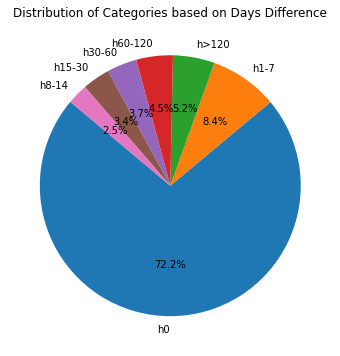

In [64]:
# Count the number of users for each category
category_counts = first_purchase_per_user['category'].value_counts()

# Plot pie chart
plt.figure(figsize=(10, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Categories based on Days Difference')
plt.show()


In [65]:
mean_days_difference = first_purchase_per_user.groupby('source_id')['days_difference'].mean()
# Round up and convert to integer
mean_days_difference = mean_days_difference.apply(lambda x: int(math.ceil(x)))

print('Average distance between days of first purchase per source_id ')
mean_days_difference

Average distance between days of first purchase per source_id 


source_id
1     11
2     21
3     18
4     17
5     14
7      0
9     45
10    12
Name: days_difference, dtype: int64

In [66]:
data = {
    'source_id': [1, 2, 3, 4, 5, 7, 9, 10],
    'days_convert': [11, 21, 18, 17, 14, 0, 45, 12]
}

mean_days_difference_df = pd.DataFrame(data)
mean_days_difference_df

,source_id,days_convert
0,1,11
1,2,21
2,3,18
3,4,17
4,5,14
5,7,0
6,9,45
7,10,12


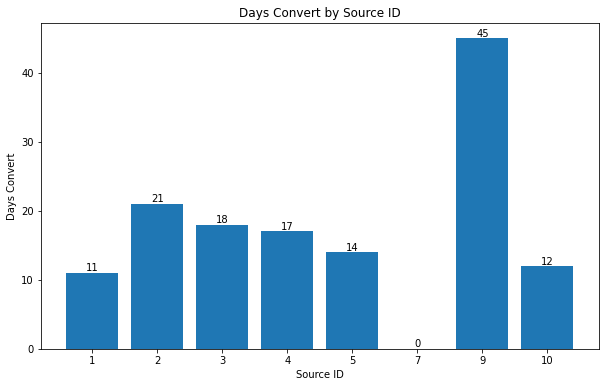

In [67]:
plt.figure(figsize=(10, 6))
plt.bar(mean_days_difference_df.index, mean_days_difference_df['days_convert'])

# Adds a value above each bar and displays all x values in the graph
for i, value in enumerate(mean_days_difference_df['days_convert']):
     plt.text(i, value, str(value), ha='center', va='bottom') # Add the value at the top of each bar

# Displays all x values in the graph
plt.xticks(mean_days_difference_df.index, mean_days_difference_df['source_id'])

plt.xlabel('Source ID')
plt.ylabel('Days Convert')
plt.title('Days Convert by Source ID')
plt.show()


In [68]:
# Counts the number of categories per source_id
category_counts = pd.crosstab(first_purchase_per_user['source_id'], first_purchase_per_user['category'])

# Calculates the total number per source_id
total_counts = category_counts.sum(axis=1)

# Calculate the percentage per category
category_percentage = category_counts.divide(total_counts, axis=0) * 100

# Adds '%' sign and formats with two decimals
category_percentage_formatted = category_percentage.applymap(lambda x: f'{x:.2f}%')

# Display the resulting DataFrame
category_percentage_formatted

category,h0,h1-7,h15-30,h30-60,h60-120,h8-14,h>120
source_id,,,,,,,
1,78.61%,8.00%,2.62%,2.24%,2.76%,2.73%,3.04%
2,67.94%,8.90%,3.54%,4.56%,5.70%,3.05%,6.30%
3,71.27%,8.70%,3.64%,3.86%,4.70%,2.43%,5.41%
4,71.86%,8.74%,3.66%,3.80%,4.46%,2.58%,4.90%
5,76.87%,7.20%,2.81%,3.06%,3.62%,2.02%,4.41%
7,100.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
9,45.31%,9.56%,5.79%,8.55%,12.59%,4.41%,13.79%
10,76.52%,9.18%,2.56%,2.33%,2.93%,2.56%,3.91%


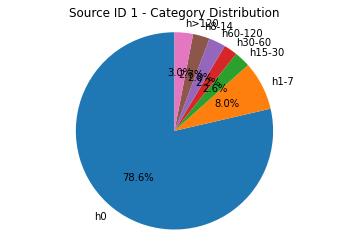

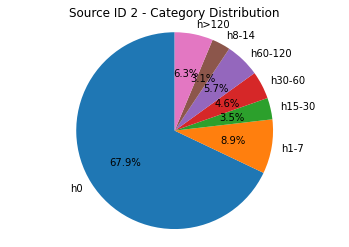

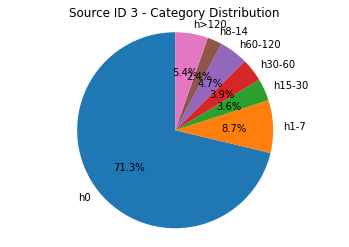

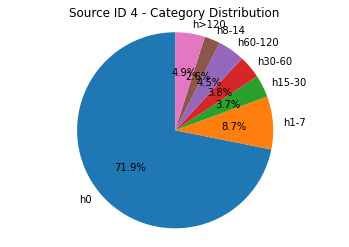

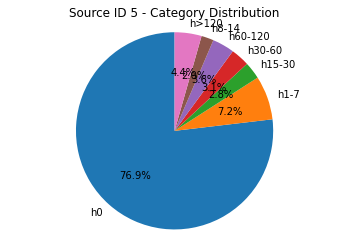

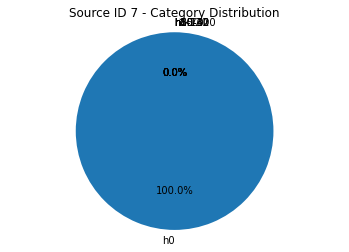

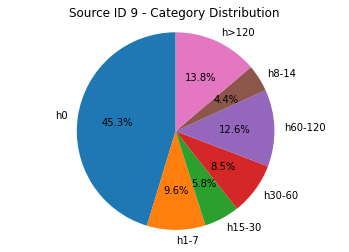

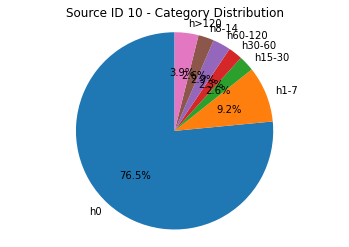

In [69]:
# Group by 'source_id' and 'category', then count the sum.
grouped = first_purchase_per_user.groupby(['source_id', 'category']).size().unstack(fill_value=0)

# Create a pie chart for each 'source_id'.
for source_id, row in grouped.iterrows():
    plt.figure()
    plt.pie(row, labels=row.index, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title(f'Source ID {source_id} - Category Distribution')

plt.show()


<b>Explanation</b> <a class="tocSkip"></a>
<br>Data analysis steps were carried out on two DataFrames, namely 'first_purchase_per_user' and 'first_start_ts_per_user', to understand user behavior in terms of time of first purchase and first visit. The following is an explanation of each stage you have carried out:

1. first_purchase_per_user:
- In the first step, you group the purchase data by the 'uid' column and retrieve the first purchase date for each user.
- You checked to see if there were duplicate UIDs in the DataFrame, but found no duplicates.
2. first_start_ts_per_user:
- In this step, you do something similar as in the first stage, but on the first visit data (start_ts).
- You combine the first visit data with the original data to get the 'source_id' of the first visit.
- You also check if there are any duplicate UIDs in this DataFrame, and find one duplicate UID, which you then remove.
3. first_purchase_per_user (data merging):

You combine DataFrame 'first_start_ts_per_user' with DataFrame 'first_purchase_per_user' based on column 'uid'.
Then you move the 'first_start_ts' column to match the order you want.
4. Calculating the Difference in Days:
- You calculate the difference in days between the date of the first visit and the date of the first purchase.
- This difference is calculated in the 'days_difference' column.
5. Creating Categories:
- You create categories based on the difference in days ('days_difference') using the 'categorize_days_difference' function.
- This category includes 'h0' (day 0), 'h-1' (negative days), 'h1-7' (days 1-7), 'h8-14' (days 8-14), 'h15-30 ' (days 15-30), 'h30-60' (days 30-60), 'h60-120' (days 60-120), and 'h>120' (days more than 120).
6. Calculating the Average:
- You calculate the average days difference ('days_difference') for all users, and this average is about 16.73 days.
- Next, you calculate the average day difference per 'source_id' (visit source) and round it up as an integer. This gives you information about the average number of days between the first visit and the first purchase for each source.
    
| source_id | Average distance between days of first purchase |
|-----------|------------------------------------- --|
| 1 | 11 |
| 2 | 21 |
| 3 | 18 |
| 4 | 17 |
| 5 | 14 |
| 7 | 0 |
| 9 | 45 |
| 10 | 12 |
    
    
<br>All of these steps are useful for understanding user behavior and the time it takes a user to make their first purchase after the first visit. This can help you plan marketing and customer retention strategies.

<b>Conclusion</b> <a class="tocSkip"></a>
<br>Based on the analysis that has been carried out on data on first purchases and first visits of users, here are several conclusions:

1. Average Time between First Visit and First Purchase: The average time a user takes between first visit and first purchase is approximately 16.73 days.

2. User Behavior Based on Visit Source ('source_id'):
- Visit source 'source_id' 2 has the highest average time of around 21 days between first visit and first purchase.
- Visit source 'source_id' 5 has the lowest average time of around 14 days between first visit and first purchase.
- Some visit sources, such as 'source_id' 7 and 'source_id' 10, have users who made a purchase on the day of the first visit.
3. Day Difference Category: The day difference category is used to further understand the distribution of time between the first visit and the first purchase. This category includes day 0 (purchases on the day of the first visit), negative days (purchases before the first visit), and various other day ranges.
    
     | categories | presentation |
|----------|------------|
| h0 | 72.18% |
| p1-7 | 8.43% |
| h>120 | 5.17% |
| p60-120 | 4.54% |
| p30-60 | 3.71% |
| p15-30 | 3.42% |
| p8-14 | 2.54% |

<br>

    
| source_id | categories | h0 | p1-7 | p15-30 | p30-60 | p60-120 | p8-14 | h>120 |
|-----------|----------|-------|-------|--------|- -------|---------|-------|-------|
| 1 | | 78.61%| 8.00% | 2.62% | 2.24% | 2.76% | 2.73% | 3.04% |
| 2 | | 67.94%| 8.90% | 3.54% | 4.56% | 5.70% | 3.05% | 6.30% |
| 3 | | 71.27%| 8.70% | 3.64% | 3.86% | 4.70% | 2.43% | 5.41% |
| 4 | | 71.86%| 8.74% | 3.66% | 3.80% | 4.46% | 2.58% | 4.90% |
| 5 | | 76.87%| 7.20% | 2.81% | 3.06% | 3.62% | 2.02% | 4.41% |
| 7 | | 100.00%| 0.00% | 0.00% | 0.00% | 0.00% | 0.00% | 0.00% |
| 9 | | 45.31%| 9.56% | 5.79% | 8.55% | 12.59% | 4.41% | 13.79% |
| 10 | | 76.52%| 9.18% | 2.56% | 2.33% | 2.93% | 2.56% | 3.91% |


<br>This analysis can provide valuable insights in planning marketing strategies, customer retention, and user experience optimization. For example, you can focus on visit sources that have a longer average time to purchase and try to speed up conversion, or you can increase retention efforts for users who take longer to make their first purchase.

[Back to Content](#back)

<a id='step2.2.2'></a>
#### 2.2.2 How many orders did they make during a certain time period?

In [70]:
# Extract date information from 'buy_ts' column
orders_data['order_date'] = orders_data['buy_ts'].dt.date

# Calculates the number of orders per day
daily_order_counts = orders_data.groupby('order_date').size()

daily_order_counts

order_date
2017-06-01     96
2017-06-02    111
2017-06-03     67
2017-06-04     66
2017-06-05    161
             ... 
2018-05-28    188
2018-05-29    189
2018-05-30    208
2018-05-31    610
2018-06-01      1
Length: 364, dtype: int64

In [71]:
# Take only the number of orders per day which is less than 50
daily_order_counts_below_50 = daily_order_counts[daily_order_counts < 50]

# Displays the number of orders per day that are less than 50
print('Number of orders per day less than 50:\n', daily_order_counts_below_50)

Number of orders per day less than 50:
 order_date
2017-06-10    42
2017-06-11    28
2017-06-12    30
2017-06-17    35
2017-06-18    20
2017-06-19    45
2017-06-20    45
2017-07-02    42
2017-07-08    48
2017-07-16    31
2017-07-22    41
2017-07-23    48
2017-07-28    47
2017-07-30    38
2017-08-01    46
2017-08-02    42
2017-08-03    45
2017-08-05    36
2017-08-06    35
2017-08-08    41
2017-08-10    42
2017-08-12    36
2017-08-13    48
2017-08-19    37
2017-08-20    39
2018-03-30    15
2018-06-01     1
dtype: int64


In [72]:
# Retrieve only days with order quantity greater than 1
daily_order_counts_greater_than_1 = daily_order_counts[daily_order_counts > 1]

# Calculates the average number of orders per day that have an order count greater than 1
mean_daily_order_counts_greater_than_1 = daily_order_counts_greater_than_1.mean()

# Displays the average number of orders per day that have an order count greater than 1
print('Average number of orders per day (number of orders > 1):', mean_daily_order_counts_greater_than_1)

Average number of orders per day (number of orders > 1): 138.88154269972452


In [73]:
# Extract week information from 'buy_ts' column
orders_data['order_week'] = orders_data['buy_ts'].dt.to_period('W')

# Calculates the number of orders per week
weekly_order_counts = orders_data.groupby('order_week').size()

weekly_order_counts

order_week
2017-05-29/2017-06-04     340
2017-06-05/2017-06-11     938
2017-06-12/2017-06-18     343
2017-06-19/2017-06-25     371
2017-06-26/2017-07-02     460
2017-07-03/2017-07-09     477
2017-07-10/2017-07-16     636
2017-07-17/2017-07-23     716
2017-07-24/2017-07-30     381
2017-07-31/2017-08-06     314
2017-08-07/2017-08-13     325
2017-08-14/2017-08-20     392
2017-08-21/2017-08-27     480
2017-08-28/2017-09-03     588
2017-09-04/2017-09-10     666
2017-09-11/2017-09-17     668
2017-09-18/2017-09-24     826
2017-09-25/2017-10-01    1110
2017-10-02/2017-10-08    1666
2017-10-09/2017-10-15    1270
2017-10-16/2017-10-22    1140
2017-10-23/2017-10-29    1132
2017-10-30/2017-11-05    1059
2017-11-06/2017-11-12     919
2017-11-13/2017-11-19    1257
2017-11-20/2017-11-26    1894
2017-11-27/2017-12-03    1387
2017-12-04/2017-12-10    1520
2017-12-11/2017-12-17    1388
2017-12-18/2017-12-24    1184
2017-12-25/2017-12-31    1620
2018-01-01/2018-01-07    1006
2018-01-08/2018-01-14     942

In [74]:
# Calculates the average number of orders per week
mean_weekly_order_counts = weekly_order_counts.mean()

# Displays the average number of orders per week
print('Average number of orders per week:', mean_weekly_order_counts)

Average number of orders per week: 951.2264150943396


In [75]:
# Extract month information from 'buy_ts' column
orders_data['order_month'] = orders_data['buy_ts'].dt.to_period('M')

# Calculates the number of orders per month
monthly_order_counts = orders_data.groupby('order_month').size()

monthly_order_counts

order_month
2017-06    2354
2017-07    2363
2017-08    1807
2017-09    3387
2017-10    5679
2017-11    5659
2017-12    6218
2018-01    4721
2018-02    5281
2018-03    5326
2018-04    3273
2018-05    4346
2018-06       1
Freq: M, dtype: int64

In [76]:
# Takes only months with order quantity greater than 1
monthly_order_counts_above_1 = monthly_order_counts[monthly_order_counts > 1]

# Calculates the average number of orders per month that have an order number greater than 1
mean_monthly_order_counts_above_1 = monthly_order_counts_above_1.mean()

# Displays the average number of orders per month that has an order number greater than 1
print('Average number of orders per month (number of orders > 1):', mean_monthly_order_counts_above_1)

Average number of orders per month (number of orders > 1): 4201.166666666667


In [77]:
# Count the number of each unique value of 'source_id'
count_per_source_id_filtered = first_purchase_per_user['source_id'].value_counts()
count_per_source_id_filtered = count_per_source_id_filtered.sort_index()

# Displays results
count_per_source_id_filtered

1      2899
2      3506
3     10473
4     10296
5      6931
7         1
9      1088
10     1329
Name: source_id, dtype: int64

In [78]:
data = {
    'source_id': [1, 2, 3, 4, 5, 7, 9, 10],
    'count_first_buyers': [2899, 3506, 10473, 10296, 6931, 1, 1088, 1329]
}

count_first_buy_df = pd.DataFrame(data)
count_first_buy_df

,source_id,count_first_buyers
0,1,2899
1,2,3506
2,3,10473
3,4,10296
4,5,6931
5,7,1
6,9,1088
7,10,1329


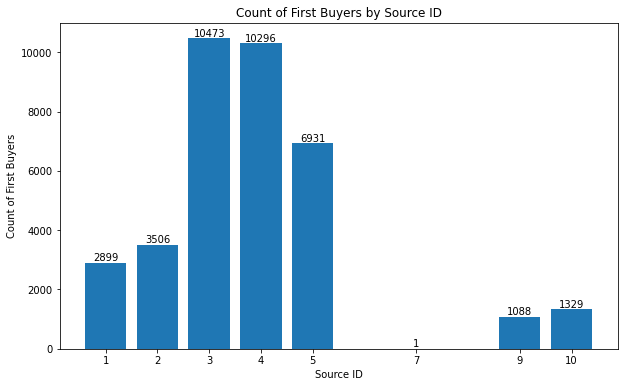

In [79]:
# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(count_first_buy_df['source_id'], count_first_buy_df['count_first_buyers'])

# Adds the value above each bar
for i, value in enumerate(count_first_buy_df['count_first_buyers']):
     plt.text(count_first_buy_df['source_id'][i], value, str(value), ha='center', va='bottom')

# Displays all x values in the graph
plt.xticks(count_first_buy_df['source_id'])

plt.xlabel('Source ID')
plt.ylabel('Count of First Buyers')
plt.title('Count of First Buyers by Source ID')
plt.show()


In [80]:
# Average number of unique uids per day per source_id
daily_mean_uid_per_source = first_purchase_per_user.groupby(['source_id', pd.to_datetime(first_purchase_per_user['first_purchase_date']).dt.date])['uid'].nunique().groupby('source_id').mean()

# Average number of unique uids per week per source_id
weekly_mean_uid_per_source = first_purchase_per_user.groupby(['source_id', pd.to_datetime(first_purchase_per_user['first_purchase_date']).dt.to_period('W')])['uid'].nunique().groupby('source_id'). mean()

# Average number of unique uids per month per source_id
monthly_mean_uid_per_source = first_purchase_per_user.groupby(['source_id', pd.to_datetime(first_purchase_per_user['first_purchase_date']).dt.to_period('M')])['uid'].nunique().groupby('source_id'). mean()

# Function to round up and convert to integer
def ceil_and_convert_to_int(value):
     return int(math. ceil(value))

# Average number of unique uids per day per source_id
daily_mean_uid_per_source = daily_mean_uid_per_source.apply(ceil_and_convert_to_int)

# Average number of unique uids per week per source_id
weekly_mean_uid_per_source = weekly_mean_uid_per_source.apply(ceil_and_convert_to_int)

# Average number of unique uids per month per source_id
monthly_mean_uid_per_source = monthly_mean_uid_per_source.apply(ceil_and_convert_to_int)

print("Average number of buyers per day per source_id (after rounding up):")
print(daily_mean_uid_per_source)

print("Average number of buyers per week per source_id (after rounding up):")
print(weekly_mean_uid_per_source)

print("Average number of buyers per month per source_id (after rounding up):")
print(monthly_mean_uid_per_source)

Average number of buyers per day per source_id (after rounding up):
source_id
1      9
2     10
3     29
4     29
5     20
7      1
9      4
10     5
Name: uid, dtype: int64
Average number of buyers per week per source_id (after rounding up):
source_id
1      55
2      67
3     198
4     195
5     131
7       1
9      21
10     26
Name: uid, dtype: int64
Average number of buyers per month per source_id (after rounding up):
source_id
1     242
2     293
3     873
4     792
5     578
7       1
9      91
10    111
Name: uid, dtype: int64


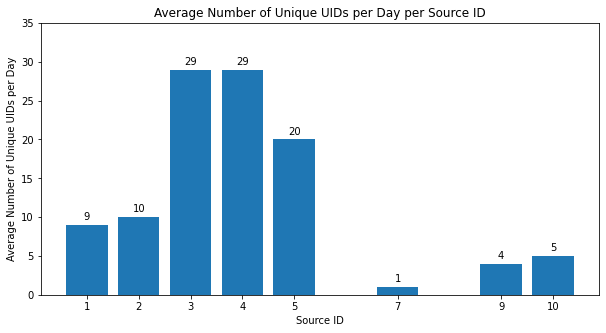

In [81]:
# Create a bar graph
plt.figure(figsize=(10, 5))
bars = plt.bar(daily_mean_uid_per_source.index, daily_mean_uid_per_source.values)

# Adds the value immediately above each bar
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points',
                 ha='center', va='bottom')

plt.xlabel('Source ID')
plt.ylabel('Average Number of Unique UIDs per Day')
plt.title('Average Number of Unique UIDs per Day per Source ID')
plt.xticks(daily_mean_uid_per_source.index)
plt.ylim(0, 35)
plt.show()


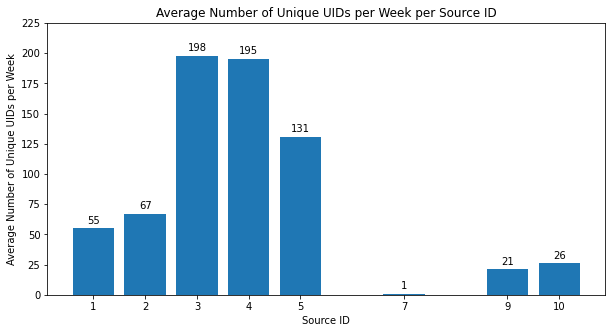

In [82]:
# Create a bar graph
plt.figure(figsize=(10, 5))
bars = plt.bar(weekly_mean_uid_per_source.index, weekly_mean_uid_per_source.values)

# Adds the value immediately above each bar
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points',
                 ha='center', va='bottom')

plt.xlabel('Source ID')
plt.ylabel('Average Number of Unique UIDs per Week')
plt.title('Average Number of Unique UIDs per Week per Source ID')
plt.xticks(weekly_mean_uid_per_source.index)
plt.ylim(0, 225)
plt.show()


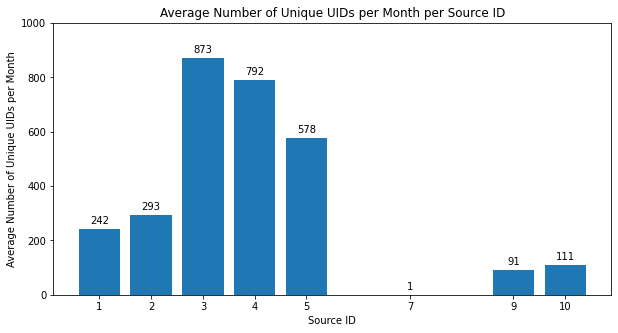

In [83]:
# Create a bar graph
plt.figure(figsize=(10, 5))
bars = plt.bar(monthly_mean_uid_per_source.index, monthly_mean_uid_per_source.values)

# Adds the value immediately above each bar
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points',
                 ha='center', va='bottom')

plt.xlabel('Source ID')
plt.ylabel('Average Number of Unique UIDs per Month')
plt.title('Average Number of Unique UIDs per Month per Source ID')
plt.xticks(monthly_mean_uid_per_source.index)
plt.ylim(0, 1000)
plt.show()


<b>Explanation</b> <a class="tocSkip"></a>
<br>This analysis includes a number of information extracted from order data (orders_data) and produces a number of statistics regarding the number of orders, average number of orders, and the number of unique buyers (uid) per day, week and month based on the source of visits ('source_id '). The following is an explanation of the results of the analysis:

1. Number of Orders per Day:
- Order data has been extracted based on purchase date ('order_date').
- Analysis results show the number of orders per day from a certain period. For example, on 2017-06-01 there were 96 orders.
2. Number of Orders per Day Less than 50:
- In this analysis, days with an order count of less than 50 have been separated.
- The results show dates where the number of orders is less than 50, such as 2017-06-10 with 42 orders.
3. Average Number of Orders per Day Greater than 1:
- Data on orders per day with a quantity greater than 1 has been calculated and the average number of orders is around 138.88 orders per day.
4. Number of Orders per Week:
- Order data has been extracted based on the week of purchase ('order_week').
- The analysis results show the number of orders per week, which makes it possible to see short-term trends.
5. Average Number of Orders per Week:
- The average number of orders per week is around 951.23 orders per week. This provides an overview of business performance during the week.
6. Number of Orders per Month:
- Order data has been extracted based on the month of purchase ('order_month').
- The analysis results show the number of orders per month, which can provide an overview of long-term trends.
7. Average Number of Orders per Month Greater than 1:
- In this analysis, months with order quantities greater than 1 have been separated.
- The average number of orders per month that have an order quantity greater than 1 is approximately 4201.17 orders per month.
8. Number of Unique Buyers per Visit Source ('source_id'):
- The unique number of buyers (uid) has been calculated for each visit source ('source_id').
- Analysis results show the number of unique buyers per visit source. Some traffic sources have more buyers than others.
9. Average Number of Unique Buyers per Day, Week and Month per Visit Source ('source_id'):
- The average number of unique buyers has been calculated per day, per week and per month for each visit source ('source_id'). The results are rounded up and converted to integer format.

    
<br>This analysis provides important insights into order patterns and shopper behavior across time periods and by visit source. This can help with marketing strategy planning, inventory management, and a deeper understanding of your business performance.

<b>Conclusion</b> <a class="tocSkip"></a>
<br>Based on the data analysis that has been carried out, the following conclusions can be drawn:

1. Daily Number of Orders:
- The data shows the variation in the number of daily orders over the analyzed period.
- There are days with the number of orders below 50.
2. Average Daily Number of Orders:
- The average number of orders per day is around 138.88 orders if only counting the days with the number of orders greater than 1.
3. Weekly Order Quantity:
- Weekly order counts show fluctuations in orders over several weeks.
- The average number of orders per week is around 951.23 orders.
4. Number of Monthly Orders:
- Monthly order counts show long-term trends.
- The average number of orders per month that have an order quantity greater than 1 is approximately 4201.17 orders.
5. Number of Unique Buyers per Visit Source:
- The unique number of buyers (uid) varies based on the source of the visit ('source_id').
    
| source_id | count_first_buyers |
|-----------|--------------------|
| 1 | 2899 |
| 2 | 3506 |
| 3 | 10473 |
| 4 | 10296 |
| 5 | 6931 |
| 7 | 1 |
| 9 | 1088 |
| 10 | 1329 |
    
    
- Some visit sources have more buyers than others.
6. Average Number of Unique Buyers:
- The average number of unique buyers per day, per week and per month has been calculated and rounded up.
- Average number of unique buyers varies by visit source.
    
| source_id | Average day | Average week | Average month |
|-----------|----------------|-----------------------|- ----------------|
| 1 | 9 | 55 | 242 |
| 2 | 10 | 67 | 293 |
| 3 | 29 | 198 | 873 |
| 4 | 29 | 195 | 792 |
| 5 | 20 | 131 | 578 |
| 7 | 1 | 1 | 1 |
| 9 | 4 | 21 | 91 |
| 10 | 5 | 26 | 111 |
    

    
<br>This analysis can help companies in making further decisions, such as inventory planning, marketing campaign management, and understanding buyer behavior. With this understanding, companies can optimize their business strategies to improve performance and efficiency.


[Back to Content](#back)

<a id='step2.2.3'></a>
#### 2.2.3 What is the average purchase size?

In [84]:
# Calculates the average purchase
average_purchase_amount = orders_data['revenue'].mean()

average_purchase_amount

4.999646930477041

In [85]:
# Calculate average revenue per uid
average_revenue_per_uid = orders_data.groupby('uid')['revenue'].mean()

# Output results
average_revenue_per_uid

uid
313578113262317          0.550000
1575281904278712         1.525000
2429014661409475        73.330000
2464366381792757         2.440000
2551852515556206         5.495000
                          ...    
18445147675727495770     3.050000
18445407535914413204     0.293333
18445601152732270159     4.220000
18446156210226471712     9.780000
18446167067214817906     7.940000
Name: revenue, Length: 36523, dtype: float64

In [86]:
# Calculate the mean of average revenue per uid
mean_revenue = average_revenue_per_uid.mean()

# Output results
mean_revenue

4.093092887696445

<b>Explanation</b> <a class="tocSkip"></a>
<br>In the code you provided, you did some calculations regarding average purchases and average revenue per user (uid) from the order data. Let's explain each step:

1. Calculating Average Purchase (average_purchase_amount):
You calculate the average of the 'revenue' column in the orders_data DataFrame, which represents the average amount of money spent on each purchase. The result is approximately 4.9996.

2. Calculating Average Revenue per UID (average_revenue_per_uid):
You group the order data by the 'uid' (user identifier) column and then calculate the average 'revenue' (revenue) for each user. The result is a Series containing average revenue per user.

3. Calculating the Average of Average Revenue per UID (mean_revenue):
You calculate the average of the previously calculated average revenue per user. This produces an average value of average revenue per user, which is the average of revenue received from all users.

As a result, the average revenue per user (mean_revenue) is around 4.0931. This means that the average income received from all users is around 4.0931. This is a metric that can provide insight into how well or poorly a business is performing in terms of revenue per user. The higher this value, the better the performance in generating revenue from each user.

[Back to Content](#back)

<a id='step2.2.4'></a>
#### 2.2.4 How much money do they contribute? (LTV)

In [87]:
# Combine with orders_data table based on UID and date of first purchase
first_purchase_with_revenue = first_purchase_per_user.merge(orders_data[['uid', 'buy_ts', 'revenue']],
                                                            left_on=['uid', 'first_purchase_date'],
                                                            right_on=['uid', 'buy_ts'],
                                                            how='left')

# Delete unnecessary columns
first_purchase_with_revenue.drop(['buy_ts'], axis=1, inplace=True)

# Display the DataFrame to which the revenue column has been added
first_purchase_with_revenue

,uid,first_start_ts,first_purchase_date,source_id,days_difference,category,revenue
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,2,106,h60-120,0.55
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,10,0,h0,1.22
2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00,3,0,h0,73.33
3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00,5,0,h0,2.44
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,5,0,h0,6.32
...,...,...,...,...,...,...,...
36518,18445147675727495770,2017-08-20 13:30:00,2017-11-24 09:03:00,5,95,h60-120,3.05
36519,18445407535914413204,2017-09-22 23:48:00,2017-09-22 23:55:00,3,0,h0,0.52
36520,18445601152732270159,2017-08-07 11:51:00,2018-03-26 22:54:00,2,231,h>120,4.22
36521,18446156210226471712,2017-11-07 10:01:00,2018-02-18 19:34:00,3,103,h60-120,9.78


In [88]:
first_purchase_with_revenue['source_id'].unique()

array([ 2, 10,  3,  5,  4,  1,  9,  7])

In [89]:
total_revenue = first_purchase_with_revenue['revenue'].sum()
print("Total money that the first buyer contributed (LTV):", total_revenue)

Total money that the first buyer contributed (LTV): 151220.67


In [90]:
total_revenue_per_source = first_purchase_with_revenue.groupby('source_id')['revenue'].sum()
print("Total money first buyer contributed (LTV) per source_id ")
print(total_revenue_per_source)

Total money first buyer contributed (LTV) per source_id 
source_id
1     12979.01
2     17824.38
3     41706.46
4     41914.99
5     29354.62
7         1.22
9      3702.17
10     3737.82
Name: revenue, dtype: float64


In [91]:
data = {'source_id': [1, 2, 3, 4, 5, 7, 9, 10],
        'ltv_first_buyer': [12979.01, 17824.38, 41706.46, 41914.99, 29354.62, 1.22, 3702.17, 3737.82]}

ltv_first_buyer_df = pd.DataFrame(data)
ltv_first_buyer_df


,source_id,ltv_first_buyer
0,1,12979.01
1,2,17824.38
2,3,41706.46
3,4,41914.99
4,5,29354.62
5,7,1.22
6,9,3702.17
7,10,3737.82


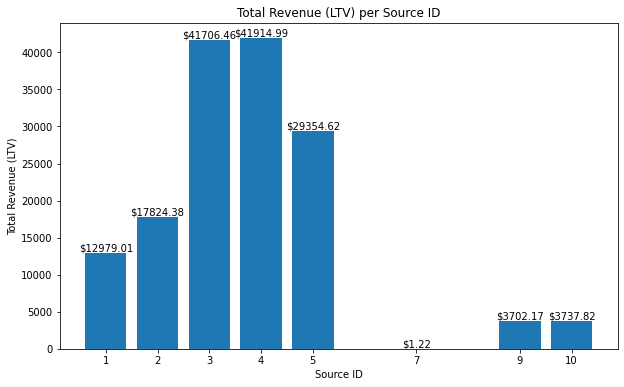

In [92]:
plt.figure(figsize=(10, 6))
bars = plt.bar(total_revenue_per_source.index, total_revenue_per_source.values)

# Adds the value immediately above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'${height:.2f}', ha='center', va='bottom')

# Displays all x values in the graph
plt.xticks(total_revenue_per_source.index)

plt.xlabel('Source ID')
plt.ylabel('Total Revenue (LTV)')
plt.title('Total Revenue (LTV) per Source ID')
plt.show()


<b>Explanation</b> <a class="tocSkip"></a>
<br>You are conducting an analysis regarding the grouping of first buyers based on source (source_id) and calculating the total revenue (LTV - Lifetime Value) they contribute. Let's explain the steps:

1. Data Merge: You start by combining two DataFrames, namely first_purchase_per_user and orders_data. Merging is done based on the columns 'uid' (user identifier) and 'first_purchase_date' (date of first purchase), which is the data of the first user to purchase. The merge results are stored in the DataFrame first_purchase_with_revenue.

2. Removal of Unnecessary Columns: After merging, you decide to delete the unneeded column 'buy_ts' in DataFrame first_purchase_with_revenue by using drop.

3. DataFrame Results: You display the DataFrame first_purchase_with_revenue, which now contains an additional column 'revenue' that presents the revenue from each purchase made by the first user.

4. Unique Source_id: You use unique() to identify the unique value in the 'source_id' column of the first_purchase_with_revenue DataFrame. This will provide a list of sources identified in the data.

5. Total Overall Revenue (LTV): You calculate the total overall revenue (LTV) earned from first users. This is the sum of the 'revenue' column in the DataFrame first_purchase_with_revenue. The result is approximately 151,220.67.

6. Total Revenue per Source (LTV) (total_revenue_per_source): You calculate the total revenue (LTV) earned from the first user per source (source_id). This is done by grouping the DataFrame first_purchase_with_revenue by 'source_id' and calculating the total revenue from each group. The result is a list of total income per source. For example, source (source_id) 1 generates total revenue of about 12,979.01, source 2 about 17,824.38, and so on.
    
| source_id | Total money that the first buyer contributed (LTV) |
|-----------|------------------------------------- ----------|
| 1 | 12979.01 |
| 2 | 17824.38 |
| 3 | 41706.46 |
| 4 | 41914.99 |
| 5 | 29354.62 |
| 7 | 1.22 |
| 9 | 3702.17 |
| 10 | 3737.82 |
    

<br>This analysis is useful for understanding the revenue contribution of first users in relation to the sources (referral sources or channels) used to acquire these customers. This can help companies allocate their resources to the most profitable sources.

[Back to Content](#back)

<a id='step2.3'></a>
### 2.3 Marketing
<a id='step2.3.1'></a>
#### 2.3.1 How much money was spent? Overall/per source/over time

In [93]:
total_marketing_costs = costs_data['costs'].sum()
print('Total money spent on marketing overall:', total_marketing_costs)

Total money spent on marketing overall: 329131.62


In [94]:
marketing_costs_per_source = costs_data.groupby('source_id')['costs'].sum()
print('Amount of money spent on marketing per source:')
print(marketing_costs_per_source)

Amount of money spent on marketing per source:
source_id
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
Name: costs, dtype: float64


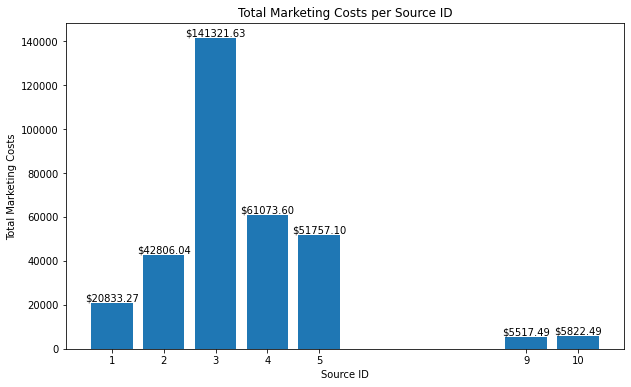

In [95]:
plt.figure(figsize=(10, 6))
bars = plt.bar(marketing_costs_per_source.index, marketing_costs_per_source.values)

# Adds the value above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'${height:.2f}', ha='center', va='bottom')

# Displays all x values in the graph
plt.xticks(marketing_costs_per_source.index, marketing_costs_per_source.index)

plt.xlabel('Source ID')
plt.ylabel('Total Marketing Costs')
plt.title('Total Marketing Costs per Source ID')
plt.xticks(rotation=0) 
plt.show()


In [96]:
costs_data['month'] = costs_data['dt'].dt.to_period('M')
marketing_costs_over_time = costs_data.groupby('month')['costs'].sum()
print('Change in marketing spend over time:')
print(marketing_costs_over_time)

Change in marketing spend over time:
month
2017-06    18015.00
2017-07    18240.59
2017-08    14790.54
2017-09    24368.91
2017-10    36322.88
2017-11    37907.88
2017-12    38315.35
2018-01    33518.52
2018-02    32723.03
2018-03    30415.27
2018-04    22289.38
2018-05    22224.27
Freq: M, Name: costs, dtype: float64


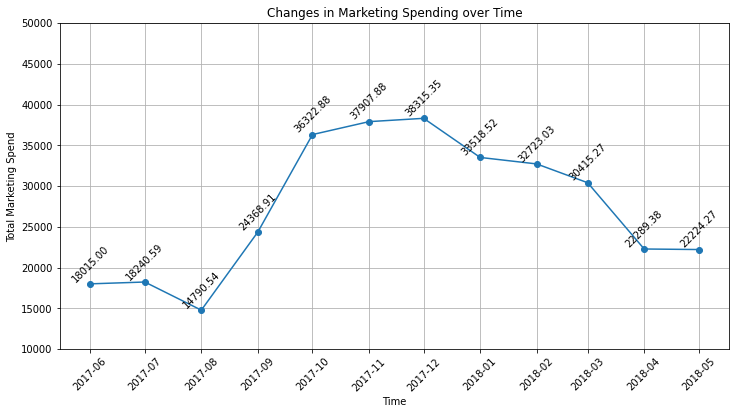

In [97]:
plt.figure(figsize=(12, 6))
x_labels = marketing_costs_over_time.index.to_timestamp() # Convert period object to timestamp
plt.plot(x_labels, marketing_costs_over_time.values, marker='o', linestyle='-')
plt.xlabel('Time')
plt.ylabel('Total Marketing Spend')
plt.title('Changes in Marketing Spending over Time')
plt.grid(True)

# Add a y value to each marker with a 45 degree rotation
for x, y in zip(x_labels, marketing_costs_over_time.values):
     plt.text(x, y, f'{y:.2f}', ha='center', va='bottom', rotation=45)

# Displays all x values in the graph
plt.xticks(x_labels, [label.strftime('%Y-%m') for label in x_labels], rotation=45)
plt.ylim(10000, 50000)
plt.show()

<b>Explanation</b> <a class="tocSkip"></a>
<br>calculate and analyze marketing costs based on cost data (costs_data). Let's explain each part of the code:

1. Total Overall Marketing Spend:
- This code calculates the total money spent on marketing overall by adding up all marketing costs from the costs_data DataFrame.
- The results are stored in the total_marketing_costs variable.
- The results are then printed as a total of overall marketing expenditure.
2. Marketing Expenditures per Source:
- This code calculates the amount of money spent on marketing per source. This is done by grouping the cost data based on the 'source_id' column and adding up the costs for each source.
- The results are stored in the marketing_costs_per_source variable.
- The results are then printed as marketing expenditure per source.

| source_id | Amount of Money Spent on Marketing |
|-----------|------------------------------------- -------|
| 1 | 20,833.27 |
| 2 | 42,806.04 |
| 3 | 141,321.63 |
| 4 | 61,073.60 |
| 5 | 51,757.10 |
| 9 | 5,517.49 |
| 10 | 5,822.49 |
    
    
3. Changes in Marketing Spending over Time:
- This code calculates changes in marketing spend over time. This is done by adding a 'month' column that takes the month period from the 'dt' (date) column in the costs_data DataFrame.
- Then, the data is grouped by month ('month') and the amount of marketing expenditure is calculated for each month.
- The results are stored in the marketing_costs_over_time variable.
- The results are then printed as changes in marketing spend over time.

    
<br>With this code, you can analyze your overall marketing spend, understand how much is spent on each marketing source, and see how marketing spend changes over time, especially by month.

<b>Conclusion</b> <a class="tocSkip"></a>
<br>In the analysis that has been carried out, we can draw several important conclusions from the data that has been processed:

1. Total Overall Marketing Spend:
- Total overall marketing expenditure was 329,131.62 currency units (currency value used in the data). This is the total amount of money that has been spent on marketing over the observed time period.
2. Marketing Expenditures per Source:
- Marketing expenditures vary based on marketing sources (source). The marketing source with source_id 3 had the highest expenditure of 141,321.63 currency units, while source_id 7 had the lowest expenditure of 5,517.49 currency units. This illustrates how budget allocation varies between marketing sources.
3. Changes in Marketing Spending over Time:
- Marketing spend fluctuated over the observed time period (from June 2017 to May 2018). Marketing spending tends to increase in certain months, peaking in October 2017 at 36,322.88 currency units. These changes reflect how marketing budget planning and allocation can be influenced by various factors, including seasonality and special events.
In conclusion, this analysis provides insight into overall marketing spend, budget allocation to various marketing sources, and changes in marketing spend over time. This information can be used to make strategic decisions regarding marketing budgets and future planning.
    
| month | Marketing Expenditures |
|:---------:|------------------------|
| 2017-06 | 18,015.00 |
| 2017-07 | 18,240.59 |
| 2017-08 | 14,790.54 |
| 2017-09 | 24,368.91 |
| 2017-10 | 36,322.88 |
| 2017-11 | 37,907.88 |
| 2017-12 | 38,315.35 |
| 2018-01 | 33,518.52 |
| 2018-02 | 32,723.03 |
| 2018-03 | 30,415.27 |
| 2018-04 | 22,289.38 |
| 2018-05 | 22,224.27 |

<a id='step2.3.2'></a>
#### 2.3.2 What are the customer acquisition costs from each source?

In [98]:
first_purchase_with_revenue

,uid,first_start_ts,first_purchase_date,source_id,days_difference,category,revenue
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,2,106,h60-120,0.55
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,10,0,h0,1.22
2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00,3,0,h0,73.33
3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00,5,0,h0,2.44
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,5,0,h0,6.32
...,...,...,...,...,...,...,...
36518,18445147675727495770,2017-08-20 13:30:00,2017-11-24 09:03:00,5,95,h60-120,3.05
36519,18445407535914413204,2017-09-22 23:48:00,2017-09-22 23:55:00,3,0,h0,0.52
36520,18445601152732270159,2017-08-07 11:51:00,2018-03-26 22:54:00,2,231,h>120,4.22
36521,18446156210226471712,2017-11-07 10:01:00,2018-02-18 19:34:00,3,103,h60-120,9.78


In [99]:
first_purchase_with_revenue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36523 entries, 0 to 36522
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   uid                  36523 non-null  uint64        
 1   first_start_ts       36523 non-null  datetime64[ns]
 2   first_purchase_date  36523 non-null  datetime64[ns]
 3   source_id            36523 non-null  int64         
 4   days_difference      36523 non-null  int64         
 5   category             36523 non-null  object        
 6   revenue              36523 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(2), object(1), uint64(1)
memory usage: 2.2+ MB


In [100]:
# Add column 'first_purchase_month' with date from 'first_purchase_date'
first_purchase_with_revenue['first_purchase_date_costs'] = first_purchase_with_revenue['first_purchase_date'].dt.date

# Display a DataFrame with column 'first_purchase_month'
first_purchase_with_revenue

,uid,first_start_ts,first_purchase_date,source_id,days_difference,category,revenue,first_purchase_date_costs
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,2,106,h60-120,0.55,2018-01-03
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,10,0,h0,1.22,2017-06-03
2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00,3,0,h0,73.33,2017-10-11
3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00,5,0,h0,2.44,2018-01-28
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,5,0,h0,6.32,2017-11-24
...,...,...,...,...,...,...,...,...
36518,18445147675727495770,2017-08-20 13:30:00,2017-11-24 09:03:00,5,95,h60-120,3.05,2017-11-24
36519,18445407535914413204,2017-09-22 23:48:00,2017-09-22 23:55:00,3,0,h0,0.52,2017-09-22
36520,18445601152732270159,2017-08-07 11:51:00,2018-03-26 22:54:00,2,231,h>120,4.22,2018-03-26
36521,18446156210226471712,2017-11-07 10:01:00,2018-02-18 19:34:00,3,103,h60-120,9.78,2018-02-18


In [101]:
# Convert column 'first_purchase_date_costs' to datetime type if not already
first_purchase_with_revenue['first_purchase_date_costs'] = pd.to_datetime(first_purchase_with_revenue['first_purchase_date_costs'])

# Combine 'costs_data' with 'first_purchase_with_revenue' based on 'source_id' and 'first_purchase_date_costs'
first_purchase_with_revenue_with_costs = first_purchase_with_revenue.merge(costs_data, left_on=['source_id', 'first_purchase_date_costs'], right_on=['source_id', 'dt'], how='left')

# Remove duplicate 'dt' columns (if necessary)
first_purchase_with_revenue_with_costs.drop(columns=['dt'], inplace=True)
first_purchase_with_revenue_with_costs.drop(columns=['month'], inplace=True)

# Returns the resulting DataFrame
first_purchase_with_revenue_with_costs

,uid,first_start_ts,first_purchase_date,source_id,days_difference,category,revenue,first_purchase_date_costs,costs
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,2,106,h60-120,0.55,2018-01-03,137.03
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,10,0,h0,1.22,2017-06-03,9.62
2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00,3,0,h0,73.33,2017-10-11,433.84
3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00,5,0,h0,2.44,2018-01-28,129.77
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,5,0,h0,6.32,2017-11-24,719.22
...,...,...,...,...,...,...,...,...,...
36518,18445147675727495770,2017-08-20 13:30:00,2017-11-24 09:03:00,5,95,h60-120,3.05,2017-11-24,719.22
36519,18445407535914413204,2017-09-22 23:48:00,2017-09-22 23:55:00,3,0,h0,0.52,2017-09-22,281.40
36520,18445601152732270159,2017-08-07 11:51:00,2018-03-26 22:54:00,2,231,h>120,4.22,2018-03-26,212.38
36521,18446156210226471712,2017-11-07 10:01:00,2018-02-18 19:34:00,3,103,h60-120,9.78,2018-02-18,241.55


In [102]:
# Check if there are NaN values in the DataFrame
nan_check = first_purchase_with_revenue_with_costs.isna().any()

# Show check results
nan_check

uid                          False
first_start_ts               False
first_purchase_date          False
source_id                    False
days_difference              False
category                     False
revenue                      False
first_purchase_date_costs    False
costs                         True
dtype: bool

In [103]:
# Replace NaN values with 0 in the 'costs' column
first_purchase_with_revenue_with_costs['costs'] = first_purchase_with_revenue_with_costs['costs'].fillna(0)

# Check if there are NaN values in the DataFrame
nan_check = first_purchase_with_revenue_with_costs.isna().any()

# Show check results
nan_check

uid                          False
first_start_ts               False
first_purchase_date          False
source_id                    False
days_difference              False
category                     False
revenue                      False
first_purchase_date_costs    False
costs                        False
dtype: bool

In [104]:
# Filter rows with duplicate values in the 'source_id', 'first_purchase_date_costs', and 'costs' columns
duplicates = first_purchase_with_revenue_with_costs[first_purchase_with_revenue_with_costs.duplicated(subset=['source_id', 'first_purchase_date_costs', 'costs'])]

# Show the results
print(duplicates[['source_id', 'first_purchase_date_costs', 'costs']])

       source_id first_purchase_date_costs   costs
20             3                2017-12-08  422.58
52             4                2017-08-24   45.19
65             4                2017-09-20   51.30
79             2                2018-05-31  254.15
105            5                2018-02-04  173.87
...          ...                       ...     ...
36518          5                2017-11-24  719.22
36519          3                2017-09-22  281.40
36520          2                2018-03-26  212.38
36521          3                2018-02-18  241.55
36522          5                2017-10-17  121.31

[34088 rows x 3 columns]


In [105]:
# Group the DataFrame by the columns 'source_id', 'first_purchase_date_costs', and 'costs', then count the number of occurrences
first_purchase_with_revenue_with_costs['count'] = first_purchase_with_revenue_with_costs.groupby(['source_id', 'first_purchase_date_costs', 'costs'])['source_id'].transform('count')

# Display DataFrame with column 'count'
print(first_purchase_with_revenue_with_costs[['source_id', 'first_purchase_date_costs', 'costs', 'count']])

       source_id first_purchase_date_costs   costs  count
0              2                2018-01-03  137.03     13
1             10                2017-06-03    9.62      7
2              3                2017-10-11  433.84     43
3              5                2018-01-28  129.77     11
4              5                2017-11-24  719.22     57
...          ...                       ...     ...    ...
36518          5                2017-11-24  719.22     57
36519          3                2017-09-22  281.40     28
36520          2                2018-03-26  212.38     21
36521          3                2018-02-18  241.55     36
36522          5                2017-10-17  121.31     21

[36523 rows x 4 columns]


In [106]:
# Calculate the average cost per occurrence
first_purchase_with_revenue_with_costs['costs_per_count'] = first_purchase_with_revenue_with_costs['costs'] / first_purchase_with_revenue_with_costs['count']

# Display DataFrame with column 'costs_per_count'
print(first_purchase_with_revenue_with_costs[['source_id', 'first_purchase_date_costs', 'costs', 'count', 'costs_per_count']])

       source_id first_purchase_date_costs   costs  count  costs_per_count
0              2                2018-01-03  137.03     13        10.540769
1             10                2017-06-03    9.62      7         1.374286
2              3                2017-10-11  433.84     43        10.089302
3              5                2018-01-28  129.77     11        11.797273
4              5                2017-11-24  719.22     57        12.617895
...          ...                       ...     ...    ...              ...
36518          5                2017-11-24  719.22     57        12.617895
36519          3                2017-09-22  281.40     28        10.050000
36520          2                2018-03-26  212.38     21        10.113333
36521          3                2018-02-18  241.55     36         6.709722
36522          5                2017-10-17  121.31     21         5.776667

[36523 rows x 5 columns]


In [107]:
first_purchase_with_revenue_with_costs

,uid,first_start_ts,first_purchase_date,source_id,days_difference,category,revenue,first_purchase_date_costs,costs,count,costs_per_count
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,2,106,h60-120,0.55,2018-01-03,137.03,13,10.540769
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,10,0,h0,1.22,2017-06-03,9.62,7,1.374286
2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00,3,0,h0,73.33,2017-10-11,433.84,43,10.089302
3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00,5,0,h0,2.44,2018-01-28,129.77,11,11.797273
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,5,0,h0,6.32,2017-11-24,719.22,57,12.617895
...,...,...,...,...,...,...,...,...,...,...,...
36518,18445147675727495770,2017-08-20 13:30:00,2017-11-24 09:03:00,5,95,h60-120,3.05,2017-11-24,719.22,57,12.617895
36519,18445407535914413204,2017-09-22 23:48:00,2017-09-22 23:55:00,3,0,h0,0.52,2017-09-22,281.40,28,10.050000
36520,18445601152732270159,2017-08-07 11:51:00,2018-03-26 22:54:00,2,231,h>120,4.22,2018-03-26,212.38,21,10.113333
36521,18446156210226471712,2017-11-07 10:01:00,2018-02-18 19:34:00,3,103,h60-120,9.78,2018-02-18,241.55,36,6.709722


In [108]:
# Group the data by 'source_id' and calculate the total cost and total number of occurrences
cac_data = first_purchase_with_revenue_with_costs.groupby('source_id').agg({'costs_per_count': 'sum', 'uid': 'count'}).reset_index()

# Calculate CAC per 'source_id'
cac_data['cac'] = cac_data['costs_per_count'] / cac_data['uid']
cac_data['cac'] = cac_data['cac'].round(2)

# Show the results
cac_data[['source_id', 'cac']]

,source_id,cac
0,1,7.17
1,2,12.20
2,3,13.49
3,4,5.93
4,5,7.47
5,7,0.00
6,9,4.39
7,10,4.03


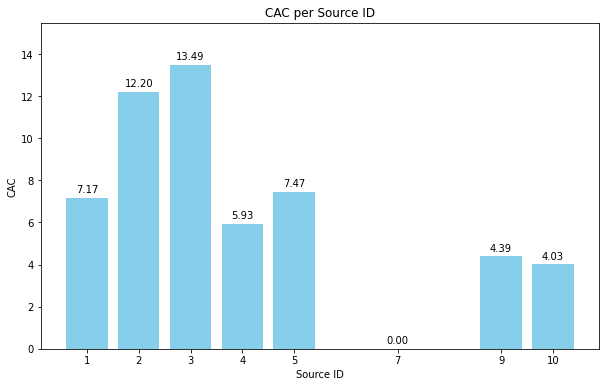

In [109]:
plt.figure(figsize=(10, 6))
bars = plt.bar(cac_data['source_id'], cac_data['cac'], color='skyblue')
plt.xlabel('Source ID')
plt.ylabel('CAC')
plt.title('CAC per Source ID')
plt.xticks(cac_data['source_id'])
plt.ylim(0, max(cac_data['cac']) + 2) # Set the y-axis range

# Adds the value above each bar
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

plt.show()


<b>Explanation</b> <a class="tocSkip"></a>
<br>In this section, we perform several data-related operations to calculate Customer Acquisition Cost (CAC) per source_id. CAC is the cost required to acquire one new customer from a particular marketing source.

Following are the steps taken:

1. DataFrame first_purchase_with_revenue_with_costs is the result of combining two DataFrames, namely first_purchase_with_revenue and costs_data, based on the 'source_id' and 'first_purchase_date_costs' columns. This data includes information about the customer's first purchase, marketing costs, as well as other related columns.

2. Possible NaN values in the 'costs' column are filled with 0.

3. Then, we find that there are duplicate rows in the DataFrame. In this case, we find multiple rows that have the same source_id, date of first purchase, and cost.

4. Next, we count the number of occurrences of the row with source_id, date of first purchase, and cost of the same, then store it in the 'count' column.

5. Cost per occurrence ('costs_per_count') is calculated by dividing the cost ('costs') by the number of occurrences ('count').

6. After that, we classify the data based on 'source_id', and calculate the number of 'costs_per_count' and the number of 'uid' (number of customers) per source_id.

7. Finally, we calculate the CAC per source_id by dividing the total 'costs_per_count' by the total 'uid'. The result is CAC per source_id which shows how much it costs to get one new customer from that marketing source.

The final result is displayed in a DataFrame cac_data, which contains the source_id and the CAC value per source_id. This data can be used to measure the efficiency of marketing sources in getting new customers.

<b>Conclusion</b> <a class="tocSkip"></a>
<br>In the data analysis that has been carried out, several important points can be concluded:

1. Average Purchase Amount: The average purchase per customer is around $5.

2. Average Revenue per User: Average revenue per user is around $4.09. This is the average of revenue per user over the analysis period.

3. Total Money Spent on Marketing (Total Marketing Costs): Total marketing costs during the analysis period were approximately $329,131.62.

4. Amount of Money Spent on Marketing per Source (Marketing Costs per Source): There are seven marketing sources with each marketing cost as follows:
- Source 1: USD 20,833.27
- Source 2: USD 42,806.04
- Source 3: USD 141,321.63
- Source 4: USD 61,073.60
- Source 5: USD 51,757.10
- Source 9: USD 5,517.49
- Source 10: USD 5,822.49
5. Changes in Marketing Expenditures Over Time (Marketing Costs Over Time): Marketing costs varied from month to month during the analysis period, with the highest amounts in October 2017 and November 2017.

6. Customer Acquisition Cost (CAC): CAC is the cost required to acquire one new customer from a particular marketing source. The CAC value per source_id is:
- Source 1: USD 7.17
- Source 2: USD 12.20
- Source 3: USD 13.49
- Source 4: USD 5.93
- Source 5: USD 7.47
- Source 7: USD 0.00 (because there are no marketing costs)
- Source 9: USD 4.39
- Source 10: USD 4.03
    
<br>This analysis helps in understanding how marketing costs contribute to revenue per user and how much it costs to acquire new customers from each marketing source. This information can be used to optimize marketing budget allocation and increase marketing efficiency to achieve business goals.

[Back to Content](#back)

<a id='step2.3.3'></a>
#### 2.3.3 How profitable is the investment? (ROI)

In [110]:
# Calculate total revenue or gross profit from sales
total_revenue = orders_data['revenue'].sum()

# Calculate total marketing costs
total_marketing_costs = costs_data['costs'].sum()

# Calculate ROI
roi = ((total_revenue - total_marketing_costs) / total_marketing_costs) * 100

# Calculate ROI and add the '%' sign and two decimals
roi_formatted = '{:.2f}%'.format(roi)

# Show results
print('ROI (Return on Investment):', roi_formatted)

ROI (Return on Investment): -23.42%


<b>Explanation</b> <a class="tocSkip"></a>
<br>A negative ROI result (-23.42%) indicates that current marketing investments are generating greater losses compared to the income generated from these investments. This shows that marketing costs exceed the profits earned from sales.

It's important to analyze and reconsider marketing strategies, costs, and operational efficiencies to look for ways to increase ROI and make marketing investments more profitable. This may involve re-evaluating marketing strategies, adjusting costs, or improving the efficiency of marketing campaigns.

[Back to Content](#back)

<a id='step3'></a>
## Step 3. Write down your conclusion: tell the marketing specialists how much money should be invested and where the money should be invested.

In [111]:
# Group visits_data by 'uid' and 'source_id', and get the minimum 'start_ts'
min_start_ts_per_visit = visits_data.groupby(['uid', 'source_id'], as_index=False)['start_ts'].min()

# Merge orders_data with the minimum 'start_ts' for each visit
merged_data = pd.merge_asof(orders_data.sort_values('buy_ts'), min_start_ts_per_visit.sort_values('start_ts'),
                             by=['uid'], left_on='buy_ts', right_on='start_ts', suffixes=('', '_visit'))

# Display the merged data
merged_data

,buy_ts,revenue,uid,order_date,order_week,order_month,source_id,start_ts
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-05-29/2017-06-04,2017-06,1,2017-06-01 00:09:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-05-29/2017-06-04,2017-06,2,2017-06-01 00:14:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-05-29/2017-06-04,2017-06,2,2017-06-01 00:25:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-05-29/2017-06-04,2017-06,2,2017-06-01 00:14:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-05-29/2017-06-04,2017-06,3,2017-06-01 07:31:00
...,...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31,2018-05-28/2018-06-03,2018-05,4,2018-05-31 09:11:00
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31,2018-05-28/2018-06-03,2018-05,10,2018-05-31 23:05:00
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31,2018-05-28/2018-06-03,2018-05,3,2018-05-31 23:52:00
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31,2018-05-28/2018-06-03,2018-05,5,2017-12-12 16:20:00


In [112]:
# Move the 'start_ts' column to the left of 'buy_ts'
merged_data.insert(0, 'start_ts', merged_data.pop('start_ts'))

# Move the 'source_id' column to the right of 'buy_ts'
merged_data.insert(2, 'source_id', merged_data.pop('source_id'))

# Display DataFrame after changes
merged_data

,start_ts,buy_ts,source_id,revenue,uid,order_date,order_week,order_month
0,2017-06-01 00:09:00,2017-06-01 00:10:00,1,17.00,10329302124590727494,2017-06-01,2017-05-29/2017-06-04,2017-06
1,2017-06-01 00:14:00,2017-06-01 00:25:00,2,0.55,11627257723692907447,2017-06-01,2017-05-29/2017-06-04,2017-06
2,2017-06-01 00:25:00,2017-06-01 00:27:00,2,0.37,17903680561304213844,2017-06-01,2017-05-29/2017-06-04,2017-06
3,2017-06-01 00:14:00,2017-06-01 00:29:00,2,0.55,16109239769442553005,2017-06-01,2017-05-29/2017-06-04,2017-06
4,2017-06-01 07:31:00,2017-06-01 07:58:00,3,0.37,14200605875248379450,2017-06-01,2017-05-29/2017-06-04,2017-06
...,...,...,...,...,...,...,...,...
50410,2018-05-31 09:11:00,2018-05-31 23:50:00,4,4.64,12296626599487328624,2018-05-31,2018-05-28/2018-06-03,2018-05
50411,2018-05-31 23:05:00,2018-05-31 23:50:00,10,5.80,11369640365507475976,2018-05-31,2018-05-28/2018-06-03,2018-05
50412,2018-05-31 23:52:00,2018-05-31 23:54:00,3,0.30,1786462140797698849,2018-05-31,2018-05-28/2018-06-03,2018-05
50413,2017-12-12 16:20:00,2018-05-31 23:56:00,5,3.67,3993697860786194247,2018-05-31,2018-05-28/2018-06-03,2018-05


In [113]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50415 entries, 0 to 50414
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   start_ts     50415 non-null  datetime64[ns]
 1   buy_ts       50415 non-null  datetime64[ns]
 2   source_id    50415 non-null  int64         
 3   revenue      50415 non-null  float64       
 4   uid          50415 non-null  uint64        
 5   order_date   50415 non-null  object        
 6   order_week   50415 non-null  period[W-SUN] 
 7   order_month  50415 non-null  period[M]     
dtypes: datetime64[ns](2), float64(1), int64(1), object(1), period[M](1), period[W-SUN](1), uint64(1)
memory usage: 3.5+ MB


In [114]:
# Convert the data type of the 'order_date' column in merged_data to datetime
merged_data['order_date'] = pd.to_datetime(merged_data['order_date'])

# Merge the 'costs' column from costs_data to merged_data
merged_data = pd.merge(merged_data, costs_data,
                        left_on=['source_id', 'order_date'],
                        right_on=['source_id', 'dt'],
                        how='left')

# Remove column 'dt' after merging
merged_data.drop('dt', axis=1, inplace=True)
merged_data.drop('month', axis=1, inplace=True)


# Show information about merged_data
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50415 entries, 0 to 50414
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   start_ts     50415 non-null  datetime64[ns]
 1   buy_ts       50415 non-null  datetime64[ns]
 2   source_id    50415 non-null  int64         
 3   revenue      50415 non-null  float64       
 4   uid          50415 non-null  uint64        
 5   order_date   50415 non-null  datetime64[ns]
 6   order_week   50415 non-null  period[W-SUN] 
 7   order_month  50415 non-null  period[M]     
 8   costs        50413 non-null  float64       
dtypes: datetime64[ns](3), float64(2), int64(1), period[M](1), period[W-SUN](1), uint64(1)
memory usage: 3.8 MB


In [115]:
merged_data.head()

,start_ts,buy_ts,source_id,revenue,uid,order_date,order_week,order_month,costs
0,2017-06-01 00:09:00,2017-06-01 00:10:00,1,17.00,10329302124590727494,2017-06-01,2017-05-29/2017-06-04,2017-06,75.20
1,2017-06-01 00:14:00,2017-06-01 00:25:00,2,0.55,11627257723692907447,2017-06-01,2017-05-29/2017-06-04,2017-06,132.56
2,2017-06-01 00:25:00,2017-06-01 00:27:00,2,0.37,17903680561304213844,2017-06-01,2017-05-29/2017-06-04,2017-06,132.56
3,2017-06-01 00:14:00,2017-06-01 00:29:00,2,0.55,16109239769442553005,2017-06-01,2017-05-29/2017-06-04,2017-06,132.56
4,2017-06-01 07:31:00,2017-06-01 07:58:00,3,0.37,14200605875248379450,2017-06-01,2017-05-29/2017-06-04,2017-06,349.38


In [116]:
# Count the number of duplicates per group and store it in a new column 'count'
merged_data['count'] = merged_data.groupby(['source_id', 'order_date', 'costs'])['source_id'].transform('count')

merged_data['costs_copy'] = merged_data['costs']
merged_data['costs'] = merged_data['costs_copy'] / merged_data['count']
merged_data.drop(columns=['costs_copy'], inplace=True)
merged_data = merged_data.fillna(0)
merged_data

,start_ts,buy_ts,source_id,revenue,uid,order_date,order_week,order_month,costs,count
0,2017-06-01 00:09:00,2017-06-01 00:10:00,1,17.00,10329302124590727494,2017-06-01,2017-05-29/2017-06-04,2017-06,3.760000,20.0
1,2017-06-01 00:14:00,2017-06-01 00:25:00,2,0.55,11627257723692907447,2017-06-01,2017-05-29/2017-06-04,2017-06,9.468571,14.0
2,2017-06-01 00:25:00,2017-06-01 00:27:00,2,0.37,17903680561304213844,2017-06-01,2017-05-29/2017-06-04,2017-06,9.468571,14.0
3,2017-06-01 00:14:00,2017-06-01 00:29:00,2,0.55,16109239769442553005,2017-06-01,2017-05-29/2017-06-04,2017-06,9.468571,14.0
4,2017-06-01 07:31:00,2017-06-01 07:58:00,3,0.37,14200605875248379450,2017-06-01,2017-05-29/2017-06-04,2017-06,10.275882,34.0
...,...,...,...,...,...,...,...,...,...,...
50410,2018-05-31 09:11:00,2018-05-31 23:50:00,4,4.64,12296626599487328624,2018-05-31,2018-05-28/2018-06-03,2018-05,5.412527,91.0
50411,2018-05-31 23:05:00,2018-05-31 23:50:00,10,5.80,11369640365507475976,2018-05-31,2018-05-28/2018-06-03,2018-05,0.440000,40.0
50412,2018-05-31 23:52:00,2018-05-31 23:54:00,3,0.30,1786462140797698849,2018-05-31,2018-05-28/2018-06-03,2018-05,7.028205,117.0
50413,2017-12-12 16:20:00,2018-05-31 23:56:00,5,3.67,3993697860786194247,2018-05-31,2018-05-28/2018-06-03,2018-05,8.123265,49.0


In [117]:
# Merge costs_data_copy with merged_data based on 'source_id' and 'order_date'
not_merged_data = pd.merge(costs_data, merged_data, left_on=['source_id', 'dt'], right_on=['source_id', 'order_date'], how='left', indicator=True)

# Select the rows that are in costs_data_copy but not in merged_data
not_merged_data = not_merged_data[not_merged_data['_merge'] == 'left_only']

# Drop the merge indicator column
not_merged_data.drop('_merge', axis=1, inplace=True)
not_merged_data.drop(['start_ts', 'buy_ts', 'revenue', 'uid', 'order_date', 'order_week', 'order_month', 'costs_y', 'count'], axis=1, inplace=True)

# Display not_merged_data
not_merged_data


,source_id,dt,costs_x,month
35804,4,2018-03-30,15.69,2018-03
45832,5,2018-03-31,0.70,2018-03
47417,9,2017-06-07,8.58,2017-06
47425,9,2017-06-09,11.90,2017-06
47432,9,2017-06-13,10.66,2017-06
...,...,...,...,...
50262,10,2018-04-14,8.97,2018-04
50334,10,2018-04-28,9.66,2018-04
50342,10,2018-04-30,15.23,2018-04
50364,10,2018-05-09,10.63,2018-05


In [118]:
total_costs_not_merged_data = not_merged_data['costs_x'].sum()

# Calculate the sum of the 'costs' column
total_costs_merged_data = merged_data['costs'].sum()

# Print the sum of costs
print('Total Costs merged_data and not_merged_data :', total_costs_merged_data + total_costs_not_merged_data )
print('Total Costs costs_data                      :', total_costs_costs_data)

Total Costs merged_data and not_merged_data : 329131.62
Total Costs costs_data                      : 329131.62


In [119]:
total_revenue_merged_data = merged_data['revenue'].sum()
print('Total Revenue merged_data:', total_revenue_merged_data )
print('Total Revenue orders_data:', total_revenue_orders_data)

Total Revenue merged_data: 252057.19999999998
Total Revenue orders_data: 252057.19999999998


In [120]:
merged_data['profit'] = merged_data['revenue'] - merged_data['costs']
merged_data['day'] = merged_data['buy_ts'].dt.day
merged_data['day_name'] = merged_data['buy_ts'].dt.day_name()
merged_data['hour'] = merged_data['buy_ts'].dt.hour

<b>Explanation</b> <a class="tocSkip"></a>
<br>Explanation of the code above:

1. Group visit data (visits_data) by 'uid' and 'source_id', and get the smallest 'start_ts' for each visit: min_start_ts_per_visit = visits_data.groupby(['uid', 'source_id'], as_index=False)['start_ts '].min()

2. Merge orders data (orders_data) with the smallest 'start_ts' for each visit: merged_data = pd.merge_asof(orders_data.sort_values('buy_ts'), min_start_ts_per_visit.sort_values('start_ts'),by=['uid'], left_on ='buy_ts', right_on='start_ts', suffixes=('', '_visit'))

3. Move the 'start_ts' column to the left of 'buy_ts' and the 'source_id' column to the right of 'buy_ts': merged_data.insert(0, 'start_ts', merged_data.pop('start_ts'))
merged_data.insert(2, 'source_id', merged_data.pop('source_id'))

4. Convert the data type of the 'order_date' column in merged_data to datetime: merged_data['order_date'] = pd.to_datetime(merged_data['order_date'])

5. Merge the 'costs' column from costs_data to merged_data based on 'source_id' and 'order_date': merged_data = pd.merge(merged_data, costs_data, left_on=['source_id', 'order_date'], right_on=['source_id', ' dt'], how='left')
    
6. Count the number of duplicates per group and store it in a new column 'count': merged_data['count'] = merged_data.groupby(['source_id', 'order_date', 'costs'])['source_id'].transform(' count')
    
7. Calculate the cost per transaction by dividing the cost by 'count', and filling the NaN value with 0: merged_data['costs_copy'] = merged_data['costs']
merged_data['costs'] = merged_data['costs_copy'] / merged_data['count']
merged_data.drop(columns=['costs_copy'], inplace=True)
merged_data = merged_data.fillna(0)

8. Merge not_merged_data with merged_data based on 'source_id' and 'order_date', and check for rows only in not_merged_data: not_merged_data = pd.merge(costs_data, merged_data, left_on=['source_id', 'dt '], right_on=['source_id', 'order_date'], how='left', indicator=True)
not_merged_data = not_merged_data[not_merged_data['_merge'] == 'left_only']
not_merged_data.drop('_merge', axis=1, inplace=True)
not_merged_data.drop(['start_ts', 'buy_ts', 'revenue', 'uid', 'order_date', 'order_week', 'order_month', 'costs_y', 'count'], axis=1, inplace=True)

9. Calculate the total unmerged costs (not_merged_data) and the total costs in merged_data, and print them: total_costs_not_merged_data = not_merged_data['costs_x'].sum()
total_costs_merged_data = merged_data['costs'].sum()
print('Total Costs merged_data and not_merged_data:', total_costs_merged_data + total_costs_not_merged_data)
print('Total Costs costs_data:', total_costs_costs_data)
aims to validate initial and final data

10. Calculate total revenue in merged_data and total revenue in orders_data, and print them: total_revenue_merged_data = merged_data['revenue'].sum()
print('Total Revenue merged_data:', total_revenue_merged_data)
print('Total Revenue orders_data:', total_revenue_orders_data)
aims to validate initial and final data
    
11. Calculate profit by subtracting costs from revenue, and adding columns 'day', 'day_name', and 'hour' based on 'buy_ts': merged_data['profit'] = merged_data['revenue'] - merged_data[' costs']
merged_data['day'] = merged_data['buy_ts'].dt.day
merged_data['day_name'] = merged_data['buy_ts'].dt.day_name()
merged_data['hour'] = merged_data['buy_ts'].dt.hour

    
<br>Those are the steps carried out in the code above, which involve processing data related to purchases, marketing costs, and profits. The results of this process include information about costs, income and profit per transaction as well as purchase time information such as date and time. All of this can be used for further business analysis.

In [121]:
# Combines the number of occurrences of order_month, total revenue, and total costs per source_id and order_month
order_month_counts_revenue_costs_per_source = merged_data.groupby(['source_id', 'order_month']).agg({
    'order_month': 'count',
    'uid' : 'nunique',
    'revenue': 'sum',
    'costs': 'sum',
    'profit': 'sum',
})

# Get unique source_ids from the index
source_ids = order_month_counts_revenue_costs_per_source.index.get_level_values('source_id').unique()

# Iterate through the unique source_ids and display the relevant data
for source_id in source_ids:
    source_data = order_month_counts_revenue_costs_per_source.xs(source_id, level='source_id')
    print(f"Source ID {source_id}:")
    print(source_data)
  

Source ID 1:
             order_month  uid  revenue    costs   profit
order_month                                             
2017-06              316  275  1433.57  1125.61   307.96
2017-07              341  283  2037.45  1072.88   964.57
2017-08              251  191  1451.33   951.81   499.52
2017-09              465  388  2850.63  1502.01  1348.62
2017-10              778  610  5052.92  2315.75  2737.17
2017-11              866  690  4996.30  2445.16  2551.14
2017-12              982  742  4446.00  2341.20  2104.80
2018-01              665  528  2648.57  2186.18   462.39
2018-02              748  555  3041.60  2204.48   837.12
2018-03              699  564  2849.77  1893.09   956.68
2018-04              443  371  2041.78  1327.49   714.29
2018-05              596  465  3182.63  1467.61  1715.02
Source ID 2:
             order_month  uid   revenue    costs   profit
order_month                                              
2017-06              317  266   1794.82  2427.38  -632.56
20

In [122]:
# Create a DataFrame for correlation between costs, revenue, profit, and uid
corr_costs_revenue_profit_uid_month = order_month_counts_revenue_costs_per_source.groupby('source_id')[['costs', 'revenue', 'profit', 'uid']].corr()

# Displays the correlation in the desired format
print("Correlation between costs, revenue, profit, and uid per order_month:")
correlations = corr_costs_revenue_profit_uid_month['costs'].loc[:, ['revenue', 'profit', 'uid']]

for source_id in correlations.index.get_level_values(0).unique():
    print(f"source_id {source_id}:")
    print(correlations.loc[source_id].to_string())

Correlation between costs, revenue, profit, and uid per order_month:
source_id 1:
revenue    0.854250
profit     0.620458
uid        0.954646
source_id 2:
revenue    0.615625
profit     0.193213
uid        0.866249
source_id 3:
revenue    0.877923
profit    -0.907858
uid        0.957755
source_id 4:
revenue    0.895198
profit     0.096637
uid        0.927018
source_id 5:
revenue    0.473910
profit    -0.228218
uid        0.893765
source_id 7:
revenue   NaN
profit    NaN
uid       NaN
source_id 9:
revenue    0.622895
profit    -0.309117
uid        0.679304
source_id 10:
revenue    0.645192
profit    -0.489273
uid        0.578187


In [123]:
order_month_counts_revenue_costs_per_source['profit_margin'] = (order_month_counts_revenue_costs_per_source['revenue'] - order_month_counts_revenue_costs_per_source['costs']) / order_month_counts_revenue_costs_per_source['revenue']

mean_profit_margin_gt_0 = round(order_month_counts_revenue_costs_per_source[order_month_counts_revenue_costs_per_source['profit_margin'] > 0]['profit_margin'].mean(), 2)

# Define a function to calculate optimal_costs
def calculate_optimal_costs(row):
    if row['profit'] < 0:
        return row['revenue'] * ( 1 - mean_profit_margin_gt_0 ) 
    else:
        return row['costs']

# Apply the function to create the 'optimal_costs' column
order_month_counts_revenue_costs_per_source['optimal_costs'] = order_month_counts_revenue_costs_per_source.apply(calculate_optimal_costs, axis=1)

# Add the 'month' column
order_month_counts_revenue_costs_per_source['month'] = order_month_counts_revenue_costs_per_source.index.get_level_values('order_month').month

# Add the 'year' column
order_month_counts_revenue_costs_per_source['year'] = order_month_counts_revenue_costs_per_source.index.get_level_values('order_month').year

# Get unique source_ids from the index
source_ids = order_month_counts_revenue_costs_per_source.index.get_level_values('source_id').unique()

# Iterate through the unique source_ids and display the relevant data
for source_id in source_ids:
    source_data = order_month_counts_revenue_costs_per_source.xs(source_id, level='source_id')
    print(f"Source ID {source_id}:")
    print(source_data)

Source ID 1:
             order_month  uid  revenue    costs   profit  profit_margin  \
order_month                                                               
2017-06              316  275  1433.57  1125.61   307.96       0.214820   
2017-07              341  283  2037.45  1072.88   964.57       0.473420   
2017-08              251  191  1451.33   951.81   499.52       0.344181   
2017-09              465  388  2850.63  1502.01  1348.62       0.473095   
2017-10              778  610  5052.92  2315.75  2737.17       0.541701   
2017-11              866  690  4996.30  2445.16  2551.14       0.510606   
2017-12              982  742  4446.00  2341.20  2104.80       0.473414   
2018-01              665  528  2648.57  2186.18   462.39       0.174581   
2018-02              748  555  3041.60  2204.48   837.12       0.275224   
2018-03              699  564  2849.77  1893.09   956.68       0.335704   
2018-04              443  371  2041.78  1327.49   714.29       0.349837   
2018-05     

<b>Explanation</b> <a class="tocSkip"></a>
<br>Based on the data analysis that has been carried out, we can make several conclusions:

1. Performance Based on Source ID:
- There are several source_ids that have good performance with positive profits (for example, source_id 1, source_id 5).
- However, there are also source_ids with significant negative profits (for example, source_id 2, source_id 3). This may indicate that investments in these resources have not generated sufficient profits.
- Several other source_ids have significant fluctuations in their profits over various months.
2. Correlation Between Variables:
- There are several interesting correlations between variables, such as cost, revenue, profit and number of users (uid).
- The strong positive correlation between revenue and uid shows that increasing the number of users can have a positive impact on revenue.
- A positive correlation between costs and revenue indicates that increasing costs can generate more revenue (however, this must be balanced with profits).
3. Cost Optimization:
- There are efforts to calculate optimal costs. Optimal costs are costs that must be achieved to achieve profitability. In cases where profits are negative, optimal costs are those that will make profits positive. On the other hand, if profit is positive, optimal costs are costs that will maintain or increase that profit.
4. Seasonal Patterns:
- It appears that some source_ids may have seasonal trends, which can be seen from fluctuations in revenue, costs, and profits from month to month. Understanding these seasonal trends can help in planning and resource allocation.

[Back to Content](#back)

<a id='step3.1'></a>
### 3.1 Placement of costs in June 2018 to increase profits

In [124]:
# List of source_ids you want to predict
source_ids = [1, 2, 3, 4, 5, 9, 10]

# Create a dictionary to store optimal_costs predictions
predicted_costs = {}

for source_id in source_ids:
    # Create a regression model
    X = order_month_counts_revenue_costs_per_source.loc[source_id, ['order_month', 'uid', 'revenue', 'month', 'year']]
    X = sm.add_constant(X)  # Add constant column
    y = order_month_counts_revenue_costs_per_source.loc[source_id, 'optimal_costs']
    model = sm.OLS(y, X).fit()

    # Data for predictions
    new_data = np.array([1, 
                         order_month_counts_revenue_costs_per_source.loc[source_id, 'order_month'].mean(),
                         order_month_counts_revenue_costs_per_source.loc[source_id, 'uid'].mean(),
                         order_month_counts_revenue_costs_per_source.loc[source_id, 'revenue'].mean(),
                         6,
                         2018])

    # Make predictions and save the results in the dictionary
    predicted_costs[source_id] = model.predict(new_data).round(2)

# Displays prediction results
for source_id, prediction in predicted_costs.items():
    print(f"Predict optimal_costs source_id {source_id} for June 2018: {prediction}")


Predict optimal_costs source_id 1 for June 2018: [1479.56]
Predict optimal_costs source_id 2 for June 2018: [2091.12]
Predict optimal_costs source_id 3 for June 2018: [3120.78]
Predict optimal_costs source_id 4 for June 2018: [3117.25]
Predict optimal_costs source_id 5 for June 2018: [3422.93]
Predict optimal_costs source_id 9 for June 2018: [286.]
Predict optimal_costs source_id 10 for June 2018: [307.49]


<b>Answer</b> <a class="tocSkip"></a>
<br>Based on the optimal_costs prediction results for a particular source_id in June 2018, the following are the conclusions:

1. Source ID 1: The predicted optimal_costs for source_id 1 is around 1479.56.
2. Source ID 2: The predicted optimal_costs for source_id 2 is around 2091.12.
3. Source ID 3: The predicted optimal_costs for source_id 3 is around 3120.78.
4. Source ID 4: The predicted optimal_costs for source_id 4 is around 3117.25.
5. Source ID 5: The predicted optimal_costs for source_id 5 is around 3422.93.
6. Source ID 9: Predicted optimal_costs for source_id 9 is around 286.00.
7. Source ID 10: The predicted optimal_costs for source_id 10 is around 307.49.

This prediction can be used as a guide to optimize costs per source_id in June 2018. Thus, businesses can strive to achieve costs close to or equal to this predicted figure to maintain profitability. In the case of source_id 9 and 10, predictions show that relatively low optimal costs can be maintained to still achieve profitability. Meanwhile, source_id 5 requires higher optimal costs to maintain or increase profitability.

[Back to Content](#back)

<b>Next Steps</b> <a class="tocSkip"></a>
<br>We calculate the correlation or relationship between costs and revenue, profit, UID to UID, weekly, date, name of day and hour


<a id='step3.2'></a>
### 3.2 Correlation of costs with revenue, profit, uid against uid

In [125]:
# Combines the number of UID occurrences, total revenue, and total costs per source_id and uid
uid_counts_revenue_costs_per_source = merged_data.groupby(['source_id', 'uid']).agg({
     'uid': 'count',
     'revenue': 'sum',
     'costs': 'sum',
     'profit': 'sum',
})

# Sort by largest revenue
sorted_uid_counts_revenue_costs_per_source = uid_counts_revenue_costs_per_source.sort_values(by='revenue', ascending=False)

# Displays results per source_id
unique_source_ids = sorted_uid_counts_revenue_costs_per_source.index.get_level_values('source_id').unique()

for source_id in unique_source_ids:
    source_data = sorted_uid_counts_revenue_costs_per_source.loc[source_id]
    print(f"\nSource_id {source_id}:")
    print(source_data)



Source_id 5:
                      uid  revenue       costs       profit
uid                                                        
11149926373378902217   13  9195.50   59.056795  9136.443205
17999372575896145244   22  1449.65  133.792296  1315.857704
6268225112727843212    42  1115.55  179.700176   935.849824
3263486045884611639   111   882.35  600.622787   281.727213
5539673724080479777    11   598.57   33.444652   565.125348
...                   ...      ...         ...          ...
4248980791902928895     1     0.03    6.607500    -6.577500
9806743452190840868     1     0.03    5.088571    -5.058571
7906515231653483985     1     0.03    6.182368    -6.152368
12260021690862624113    1     0.03    4.588000    -4.558000
17030528792926543083    1     0.00    4.740500    -4.740500

[7827 rows x 4 columns]

Source_id 2:
                      uid  revenue       costs       profit
uid                                                        
5539673724080479777    22  6173.42  139.361624 

In [126]:
# Create a DataFrame for correlation between costs, revenue, profit, and uid
corr_costs_revenue_profit_uid = uid_counts_revenue_costs_per_source.groupby('source_id')[['costs', 'revenue', 'profit', 'uid']].corr()

# Displays the correlation in the desired format
print("Correlation between costs, revenue, profit, and uid per source_id:")
correlations = corr_costs_revenue_profit_uid['costs'].loc[:, ['revenue', 'profit', 'uid']]

for source_id in correlations.index.get_level_values(0).unique():
    print(f"source_id {source_id}:")
    print(correlations.loc[source_id].to_string())


Correlation between costs, revenue, profit, and uid per source_id:
source_id 1:
revenue    0.645274
profit     0.438116
uid        0.961927
source_id 2:
revenue    0.248181
profit     0.099434
uid        0.961041
source_id 3:
revenue    0.604231
profit    -0.554300
uid        0.987833
source_id 4:
revenue    0.586431
profit     0.189821
uid        0.936636
source_id 5:
revenue    0.209714
profit     0.115386
uid        0.969485
source_id 7:
revenue   NaN
profit    NaN
uid       NaN
source_id 9:
revenue    0.359929
profit    -0.110796
uid        0.639680
source_id 10:
revenue    0.233027
profit    -0.511915
uid        0.405378


[Back to Content](#back)

<a id='step3.3'></a>
### 3.3 Correlation of costs with revenue, profit, UID on a weekly basis

In [127]:
# Combines the number of occurrences of order_week, total revenue, and total costs per source_id and order_week
order_week_counts_revenue_costs_per_source = merged_data.groupby(['source_id', 'order_week']).agg({
     'order_week': 'count',
     'uid' : 'nunique',
     'revenue': 'sum',
     'costs': 'sum',
     'profit': 'sum',
})

# Sort by largest revenue
sorted_order_week_counts_revenue_costs_per_source = order_week_counts_revenue_costs_per_source.sort_values(by='revenue', ascending=False)

# Displays results per source_id
unique_source_ids_order_week = sorted_order_week_counts_revenue_costs_per_source.index.get_level_values('source_id').unique()

for source_id in unique_source_ids_order_week:
    source_data = sorted_order_week_counts_revenue_costs_per_source.loc[source_id]
    print(f"\nSource_id {source_id}:")
    print(source_data)



Source_id 2:
                       order_week  uid  revenue    costs   profit
order_week                                                       
2017-12-04/2017-12-10         231  184  6313.78  1176.64  5137.14
2017-12-11/2017-12-17         198  156  2543.31  1283.93  1259.38
2018-05-28/2018-06-03         281  267  2261.45   561.83  1699.62
2017-10-09/2017-10-15         185  153  1282.95  1115.56   167.39
2017-11-20/2017-11-26         254  222  1278.45  1593.65  -315.20
2017-09-25/2017-10-01         148  127  1134.76   966.30   168.46
2017-10-02/2017-10-08         234  186  1133.58  1261.16  -127.58
2018-01-29/2018-02-04         175  142  1088.11  1172.65   -84.54
2017-11-13/2017-11-19         138  127  1030.42  1169.99  -139.57
2017-10-16/2017-10-22         128  107  1029.26  1075.33   -46.07
2017-10-23/2017-10-29         152  128   919.31  1013.93   -94.62
2017-11-27/2017-12-03         197  159   864.81  1076.21  -211.40
2017-09-18/2017-09-24         121   81   820.31   696.43   123

In [128]:
# Create a DataFrame for correlation between costs, revenue, profit, and uid
corr_costs_revenue_profit_uid_week = order_week_counts_revenue_costs_per_source.groupby('source_id')[['costs', 'revenue', 'profit', 'uid']].corr()

# Displays the correlation in the desired format
print("Correlation between costs, revenue, profit, and uid per order_week:")
correlations = corr_costs_revenue_profit_uid_week['costs'].loc[:, ['revenue', 'profit', 'uid']]

for source_id in correlations.index.get_level_values(0).unique():
    print(f"source_id {source_id}:")
    print(correlations.loc[source_id].to_string())

Correlation between costs, revenue, profit, and uid per order_week:
source_id 1:
revenue    0.787109
profit     0.544894
uid        0.886355
source_id 2:
revenue    0.430593
profit     0.110250
uid        0.752528
source_id 3:
revenue    0.753038
profit    -0.858606
uid        0.857708
source_id 4:
revenue    0.511050
profit    -0.396723
uid        0.606981
source_id 5:
revenue    0.424053
profit    -0.102775
uid        0.828742
source_id 7:
revenue   NaN
profit    NaN
uid       NaN
source_id 9:
revenue    0.462948
profit    -0.181280
uid        0.556920
source_id 10:
revenue    0.435730
profit    -0.327969
uid        0.484282


[Back to Content](#back)

<a id='step3.4'></a>
### 3.4 Correlation of costs with revenue, profit, uid against date

In [129]:
# Combines the number of day occurrences, total revenue, and total costs per source_id and day
day_counts_revenue_costs_per_source = merged_data.groupby(['source_id', 'day']).agg({
     'day': 'count',
     'uid' : 'nunique',
     'revenue': 'sum',
     'costs': 'sum',
     'profit': 'sum',
})

# Sort by largest revenue
sorted_day_counts_revenue_costs_per_source = day_counts_revenue_costs_per_source.sort_values(by='revenue', ascending=False)

# Displays results per source_id
unique_source_ids_day = sorted_day_counts_revenue_costs_per_source.index.get_level_values('source_id').unique()

for source_id in unique_source_ids_day:
    source_data = sorted_day_counts_revenue_costs_per_source.loc[source_id]
    print(f"\nSource_id {source_id}:")
    print(source_data)



Source_id 2:
     day  uid  revenue    costs   profit
day                                     
10   187  172  5073.12  1403.93  3669.19
31   303  285  2581.92   705.38  1876.54
17   250  230  2464.96  1422.43  1042.53
12   183  165  1773.91  1443.67   330.24
14   209  194  1424.80  1405.48    19.32
27   218  188  1418.04  1422.42    -4.38
28   230  216  1339.25  1462.14  -122.89
5    215  186  1324.55  1391.79   -67.24
4    197  173  1312.56  1396.06   -83.50
16   205  185  1307.95  1476.18  -168.23
24   288  247  1237.24  1743.12  -505.88
11   193  177  1108.79  1449.28  -340.49
22   185  171  1092.33  1453.05  -360.72
8    181  172  1090.86  1433.70  -342.84
6    242  214  1084.27  1487.37  -403.10
25   244  219  1058.10  1534.36  -476.26
2    193  173  1014.49  1397.68  -383.19
29   195  178  1007.36  1312.91  -305.55
21   208  190   942.89  1354.49  -411.60
18   175  168   935.28  1254.04  -318.76
23   185  163   924.64  1219.66  -295.02
9    183  165   920.54  1317.98  -397.44
20

In [130]:
# Create a DataFrame for correlation between costs, revenue, profit, and uid
corr_costs_revenue_profit_uid_day = day_counts_revenue_costs_per_source.groupby('source_id')[['costs', 'revenue', 'profit', 'uid']].corr()

# Displays the correlation in the desired format
print("Correlation between costs, revenue, profit, and uid per day:")
correlations = corr_costs_revenue_profit_uid_day['costs'].loc[:, ['revenue', 'profit', 'uid']]

for source_id in correlations.index.get_level_values(0).unique():
    print(f"source_id {source_id}:")
    print(correlations.loc[source_id].to_string())

Correlation between costs, revenue, profit, and uid per day:
source_id 1:
revenue    0.245227
profit    -0.061126
uid        0.565985
source_id 2:
revenue   -0.146733
profit    -0.326555
uid       -0.218194
source_id 3:
revenue    0.230158
profit    -0.775806
uid        0.287845
source_id 4:
revenue    0.306432
profit    -0.862960
uid        0.231904
source_id 5:
revenue    0.565411
profit     0.319633
uid        0.649798
source_id 7:
revenue   NaN
profit    NaN
uid       NaN
source_id 9:
revenue    0.149366
profit    -0.285414
uid        0.521110
source_id 10:
revenue   -0.208279
profit    -0.592915
uid        0.324436


[Back to Content](#back)

<a id='step3.5'></a>
### 3.5 Correlation of costs with revenue, profit, uid and name of day

In [131]:
# Combines the number of occurrences of day_name, total revenue, and total costs per source_id and day_name
day_name_counts_revenue_costs_per_source = merged_data.groupby(['source_id', 'day_name']).agg({
     'day_name': 'count',
     'uid' : 'nunique',
     'revenue': 'sum',
     'costs': 'sum',
     'profit': 'sum',
})

# Sort by largest revenue
sorted_day_name_counts_revenue_costs_per_source = day_name_counts_revenue_costs_per_source.sort_values(by='revenue', ascending=False)

# Displays results per source_id
unique_source_ids_day_name = sorted_day_name_counts_revenue_costs_per_source.index.get_level_values('source_id').unique()

for source_id in unique_source_ids_day_name:
    source_data = sorted_day_name_counts_revenue_costs_per_source.loc[source_id]
    print(f"\nSource_id {source_id}:")
    print(source_data)



Source_id 5:
           day_name   uid   revenue    costs   profit
day_name                                             
Thursday       1563  1380  10784.43  8504.99  2279.44
Wednesday      1470  1279   8547.53  7482.96  1064.57
Monday         1450  1262   7930.33  8226.55  -296.22
Friday         1443  1292   7785.94  7896.15  -110.21
Tuesday        1493  1292   6836.47  7607.43  -770.96
Saturday       1156  1041   6376.70  6110.51   266.19
Sunday         1102   981   6332.20  5927.81   404.39

Source_id 4:
           day_name   uid  revenue     costs   profit
day_name                                             
Thursday       2029  1820  9894.99  10967.24 -1072.25
Friday         1971  1784  9470.05  10005.79  -535.74
Wednesday      1890  1697  8157.97   7023.65  1134.32
Tuesday        1792  1623  8077.23   8011.79    65.44
Monday         1887  1700  8069.64   8722.31  -652.67
Saturday       1510  1382  6702.07   8285.56 -1583.49
Sunday         1390  1254  5854.45   8041.57 -2187.12


In [132]:
# Create a DataFrame for correlation between costs, revenue, profit, and uid
corr_costs_revenue_profit_uid_day_name = day_name_counts_revenue_costs_per_source.groupby('source_id')[['costs', 'revenue', 'profit', 'uid']].corr()

# Displays the correlation in the desired format
print("Correlation between costs, revenue, profit, and uid per day_name:")
correlations = corr_costs_revenue_profit_uid_day_name['costs'].loc[:, ['revenue', 'profit', 'uid']]

for source_id in correlations.index.get_level_values(0).unique():
    print(f"source_id {source_id}:")
    print(correlations.loc[source_id].to_string())

Correlation between costs, revenue, profit, and uid per day_name:
source_id 1:
revenue    0.928654
profit     0.838059
uid        0.909817
source_id 2:
revenue    0.010320
profit    -0.397467
uid        0.914200
source_id 3:
revenue    0.823969
profit    -0.875618
uid        0.935190
source_id 4:
revenue    0.689351
profit    -0.330444
uid        0.517817
source_id 5:
revenue    0.773634
profit     0.202133
uid        0.958349
source_id 7:
revenue   NaN
profit    NaN
uid       NaN
source_id 9:
revenue    0.882186
profit     0.521000
uid        0.890462
source_id 10:
revenue    0.651355
profit     0.296951
uid        0.801152


[Back to Content](#back)

<a id='step3.6'></a>
### 3.6 Correlation of costs with revenue, profit, uid against hours

In [133]:
# Combines the number of hour occurrences, total revenue, total costs, and profit (revenue - costs) per source_id and hour
hour_counts_revenue_costs_profit_per_source = merged_data.groupby(['source_id', 'hour']).agg({
     'hour': 'count',
     'uid' : 'nunique',
     'revenue': 'sum',
     'costs': 'sum',
     'profit': 'sum',
})

# Sort by largest revenue
sorted_hour_counts_revenue_costs_profit_per_source = hour_counts_revenue_costs_profit_per_source.sort_values(by='revenue', ascending=False)

# Displays results per source_id
unique_source_ids_hour = sorted_hour_counts_revenue_costs_profit_per_source.index.get_level_values('source_id').unique()

for source_id in unique_source_ids_hour:
    source_data = sorted_hour_counts_revenue_costs_profit_per_source.loc[source_id]
    print(f"\nSource_id {source_id}:")
    print(source_data)



Source_id 3:
      hour  uid  revenue         costs       profit
hour                                               
12     966  854  5018.32  11428.367599 -6410.047599
11     890  769  4595.56  10679.345564 -6083.785564
17     731  667  4268.11   8813.097817 -4544.987817
13     911  822  4124.28  11006.269451 -6881.989451
15     772  706  3793.45   9202.760032 -5409.310032
14     852  764  3636.00  10314.452646 -6678.452646
10     747  648  3595.84   8694.223003 -5098.383003
16     718  657  3547.58   8877.306537 -5329.726537
21     696  681  3527.67   8281.346063 -4753.676063
22     702  696  3297.64   8458.179943 -5160.539943
18     633  585  3180.54   7747.854877 -4567.314877
19     609  579  3133.80   7382.304874 -4248.504874
20     678  655  2838.12   8322.452546 -5484.332546
23     534  526  2166.75   6543.737059 -4376.987059
9      461  423  1897.56   5570.743204 -3673.183204
0      259  258  1049.18   3022.907100 -1973.727100
8      199  198   851.54   2413.228418 -1561.68841

In [134]:
# Create a DataFrame for correlation between costs, revenue, profit, and uid
corr_costs_revenue_profit_uid_hour = hour_counts_revenue_costs_profit_per_source.groupby('source_id')[['costs', 'revenue', 'profit', 'uid']].corr()

# Displays the correlation in the desired format
print("Correlation between costs, revenue, profit, and uid per hour:")
correlations = corr_costs_revenue_profit_uid_hour['costs'].loc[:, ['revenue', 'profit', 'uid']]

for source_id in correlations.index.get_level_values(0).unique():
    print(f"source_id {source_id}:")
    print(correlations.loc[source_id].to_string())

Correlation between costs, revenue, profit, and uid per hour:
source_id 1:
revenue    0.985972
profit     0.933751
uid        0.996869
source_id 2:
revenue    0.877863
profit    -0.115596
uid        0.997767
source_id 3:
revenue    0.986207
profit    -0.992966
uid        0.997466
source_id 4:
revenue    0.989518
profit    -0.511162
uid        0.997096
source_id 5:
revenue    0.874662
profit    -0.116323
uid        0.998511
source_id 7:
revenue   NaN
profit    NaN
uid       NaN
source_id 9:
revenue    0.969740
profit     0.209689
uid        0.992545
source_id 10:
revenue    0.922162
profit    -0.519540
uid        0.967229


In [135]:
# Calculate total revenue per source_id
total_revenue_per_source = sorted_hour_counts_revenue_costs_profit_per_source.groupby('source_id')['revenue'].transform('sum')

# Add '%_optimal_costs' column to DataFrame
sorted_hour_counts_revenue_costs_profit_per_source['%_optimal_costs'] = ((sorted_hour_counts_revenue_costs_profit_per_source['revenue'] / total_revenue_per_source) * 100).round(2)


# Displays results
for source_id in unique_source_ids_hour:
    source_data = sorted_hour_counts_revenue_costs_profit_per_source.loc[source_id]
    print(f"\nSource_id {source_id}:")
    print(source_data)


Source_id 3:
      hour  uid  revenue         costs       profit  %_optimal_costs
hour                                                                
12     966  854  5018.32  11428.367599 -6410.047599             8.98
11     890  769  4595.56  10679.345564 -6083.785564             8.22
17     731  667  4268.11   8813.097817 -4544.987817             7.64
13     911  822  4124.28  11006.269451 -6881.989451             7.38
15     772  706  3793.45   9202.760032 -5409.310032             6.79
14     852  764  3636.00  10314.452646 -6678.452646             6.51
10     747  648  3595.84   8694.223003 -5098.383003             6.43
16     718  657  3547.58   8877.306537 -5329.726537             6.35
21     696  681  3527.67   8281.346063 -4753.676063             6.31
22     702  696  3297.64   8458.179943 -5160.539943             5.90
18     633  585  3180.54   7747.854877 -4567.314877             5.69
19     609  579  3133.80   7382.304874 -4248.504874             5.61
20     678  655  283

<b>Answer</b> <a class="tocSkip"></a>
<br>The correlation of costs with revenue and the number of UIDs based on hour shows a figure of 0.88 to 0.99, close to 1. It can be concluded that there is a positive correlation, this can indicate that the greater the number of unique users, the higher the income generated. On the other hand, we also see that Source_id has a significant negative correlation between profit and costs, which indicates the potential for reducing costs to increase profits. And less precise use of costs at certain hours
    
Cost optimization is determined through the history of revenue obtained every hour so that using costs in the future is expected to get the desired profit. It is highly recommended that marketing managers can place costs according to the percentage that has been obtained based on data analysis

[Back to Content](#back)

In [136]:
unique_uid_visits_data_per_source = visits_data.groupby('source_id')['uid'].nunique()
print('Uid count of all visitors per source:')
print(unique_uid_visits_data_per_source)

Uid count of all visitors per source:
source_id
1     18999
2     26245
3     74756
4     83525
5     56974
6         6
7        34
9      9264
10     8067
Name: uid, dtype: int64


In [137]:
unique_uid_merged_data_per_source = merged_data.groupby('source_id')['uid'].nunique()
print('Number of buyer uids per source:')
print(unique_uid_merged_data_per_source)

Number of buyer uids per source:
source_id
1      5262
2      4654
3      9642
4     10258
5      7827
7         1
9      1188
10     1350
Name: uid, dtype: int64


In [138]:
total_revenue_merged_data_per_source = merged_data.groupby('source_id')['revenue'].sum()
print('Total revenue per source:')
print(total_revenue_merged_data_per_source)

Total revenue per source:
source_id
1     36032.55
2     39838.42
3     55894.64
4     56226.40
5     54593.60
7         1.22
9      5171.94
10     4298.43
Name: revenue, dtype: float64


In [139]:
# Combine the output results in one DataFrame
concatenated_data = pd.concat([unique_uid_visits_data_per_source,
                                unique_uid_merged_data_per_source,
                                total_revenue_merged_data_per_source,
                                marketing_costs_per_source,
                               ], axis=1)

# Change column names to understand the data better
concatenated_data.columns = ['count_visitors',
                              'count_buyers',
                              'sum_revenue',
                              'sum_costs',
                             ]
# Replace NaN with 0 in DataFrame concatenated_data
concatenated_data.fillna(0, inplace=True)
concatenated_data['count_buyers'] = concatenated_data['count_buyers'].astype(int)
# Makes subsequent calculations easier
concatenated_data.at[7, 'sum_costs'] = 0.01

# Show combined results
concatenated_data

,count_visitors,count_buyers,sum_revenue,sum_costs
source_id,,,,
1,18999,5262,36032.55,20833.27
2,26245,4654,39838.42,42806.04
3,74756,9642,55894.64,141321.63
4,83525,10258,56226.40,61073.60
5,56974,7827,54593.60,51757.10
6,6,0,0.00,0.00
7,34,1,1.22,0.01
9,9264,1188,5171.94,5517.49
10,8067,1350,4298.43,5822.49


In [140]:
concatenated_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 1 to 10
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   count_visitors  9 non-null      int64  
 1   count_buyers    9 non-null      int64  
 2   sum_revenue     9 non-null      float64
 3   sum_costs       9 non-null      float64
dtypes: float64(2), int64(2)
memory usage: 660.0 bytes


In [141]:
concatenated_data = pd.merge(concatenated_data, mean_duration_per_source, on='source_id', how='left')
concatenated_data = pd.merge(concatenated_data, average_monthly_retention, on='source_id', how='left')
concatenated_data = pd.merge(concatenated_data, mean_days_difference_df, on='source_id', how='left')
concatenated_data = pd.merge(concatenated_data, count_first_buy_df, on='source_id', how='left')
concatenated_data = pd.merge(concatenated_data, ltv_first_buyer_df, on='source_id', how='left')
concatenated_data = pd.merge(concatenated_data, cac_data[['source_id', 'cac']], on='source_id', how='left')
concatenated_data.fillna(0, inplace=True)
concatenated_data.rename(columns={'retention': 'monthly_retention'}, inplace=True)
concatenated_data.rename(columns={'cac': 'cac_first_buyers'}, inplace=True)
concatenated_data['count_buyers'] = concatenated_data['count_buyers'].astype(int)
concatenated_data['days_convert'] = concatenated_data['days_convert'].astype(int)
concatenated_data['count_first_buyers'] = concatenated_data['count_first_buyers'].astype(int)
concatenated_data

,source_id,count_visitors,count_buyers,sum_revenue,sum_costs,session_duration,monthly_retention,days_convert,count_first_buyers,ltv_first_buyer,cac_first_buyers
0,1,18999,5262,36032.55,20833.27,18,9.63%,11,2899,12979.01,7.17
1,2,26245,4654,39838.42,42806.04,15,10.14%,21,3506,17824.38,12.20
2,3,74756,9642,55894.64,141321.63,10,5.33%,18,10473,41706.46,13.49
3,4,83525,10258,56226.40,61073.60,10,10.7%,17,10296,41914.99,5.93
4,5,56974,7827,54593.60,51757.10,9,6.04%,14,6931,29354.62,7.47
5,6,6,0,0.00,0.00,23,0.0%,0,0,0.00,0.00
6,7,34,1,1.22,0.01,11,80.86%,0,1,1.22,0.00
7,9,9264,1188,5171.94,5517.49,10,6.15%,45,1088,3702.17,4.39
8,10,8067,1350,4298.43,5822.49,12,14.69%,12,1329,3737.82,4.03


In [142]:
# Calculate Profit Margin (Profit Margin)
concatenated_data['profit_margin'] = ((concatenated_data['sum_revenue'] - concatenated_data['sum_costs']) / concatenated_data['sum_revenue']).round(2)

# Calculate ROI (Return on Investment)
concatenated_data['roi'] = (((concatenated_data['sum_revenue'] - concatenated_data['sum_costs']) / concatenated_data['sum_costs']) * 100).round(2)

# Calculate Customer Lifetime Value (CLV)
concatenated_data['clv'] = ((concatenated_data['sum_revenue'] - concatenated_data['sum_costs']) / concatenated_data['count_buyers']).round(2)

concatenated_data['conversion_rate'] = ((concatenated_data['count_buyers'] / concatenated_data['count_visitors']) * 100).round(2)
concatenated_data['cac'] = (concatenated_data['sum_costs'] / concatenated_data['count_buyers']).round(2)

# Show calculation results
concatenated_data

,source_id,count_visitors,count_buyers,sum_revenue,sum_costs,session_duration,monthly_retention,days_convert,count_first_buyers,ltv_first_buyer,cac_first_buyers,profit_margin,roi,clv,conversion_rate,cac
0,1,18999,5262,36032.55,20833.27,18,9.63%,11,2899,12979.01,7.17,0.42,72.96,2.89,27.70,3.96
1,2,26245,4654,39838.42,42806.04,15,10.14%,21,3506,17824.38,12.20,-0.07,-6.93,-0.64,17.73,9.20
2,3,74756,9642,55894.64,141321.63,10,5.33%,18,10473,41706.46,13.49,-1.53,-60.45,-8.86,12.90,14.66
3,4,83525,10258,56226.40,61073.60,10,10.7%,17,10296,41914.99,5.93,-0.09,-7.94,-0.47,12.28,5.95
4,5,56974,7827,54593.60,51757.10,9,6.04%,14,6931,29354.62,7.47,0.05,5.48,0.36,13.74,6.61
5,6,6,0,0.00,0.00,23,0.0%,0,0,0.00,0.00,NaN,NaN,NaN,0.00,NaN
6,7,34,1,1.22,0.01,11,80.86%,0,1,1.22,0.00,0.99,12100.00,1.21,2.94,0.01
7,9,9264,1188,5171.94,5517.49,10,6.15%,45,1088,3702.17,4.39,-0.07,-6.26,-0.29,12.82,4.64
8,10,8067,1350,4298.43,5822.49,12,14.69%,12,1329,3737.82,4.03,-0.35,-26.18,-1.13,16.73,4.31


<a id='step4'></a>
## 4. General Conclusion

In [143]:
concatenated_data.insert(1, 'profit_margin', concatenated_data.pop('profit_margin'))
concatenated_data.insert(2, 'roi', concatenated_data.pop('roi'))
concatenated_data.insert(3, 'clv', concatenated_data.pop('clv'))
concatenated_data.insert(4, 'conversion_rate', concatenated_data.pop('conversion_rate'))
concatenated_data.insert(5, 'cac', concatenated_data.pop('cac'))
concatenated_data.insert(6, 'days_convert', concatenated_data.pop('days_convert'))

# Show calculation results
concatenated_data

,source_id,profit_margin,roi,clv,conversion_rate,cac,days_convert,count_visitors,count_buyers,sum_revenue,sum_costs,session_duration,monthly_retention,count_first_buyers,ltv_first_buyer,cac_first_buyers
0,1,0.42,72.96,2.89,27.70,3.96,11,18999,5262,36032.55,20833.27,18,9.63%,2899,12979.01,7.17
1,2,-0.07,-6.93,-0.64,17.73,9.20,21,26245,4654,39838.42,42806.04,15,10.14%,3506,17824.38,12.20
2,3,-1.53,-60.45,-8.86,12.90,14.66,18,74756,9642,55894.64,141321.63,10,5.33%,10473,41706.46,13.49
3,4,-0.09,-7.94,-0.47,12.28,5.95,17,83525,10258,56226.40,61073.60,10,10.7%,10296,41914.99,5.93
4,5,0.05,5.48,0.36,13.74,6.61,14,56974,7827,54593.60,51757.10,9,6.04%,6931,29354.62,7.47
5,6,NaN,NaN,NaN,0.00,NaN,0,6,0,0.00,0.00,23,0.0%,0,0.00,0.00
6,7,0.99,12100.00,1.21,2.94,0.01,0,34,1,1.22,0.01,11,80.86%,1,1.22,0.00
7,9,-0.07,-6.26,-0.29,12.82,4.64,45,9264,1188,5171.94,5517.49,10,6.15%,1088,3702.17,4.39
8,10,-0.35,-26.18,-1.13,16.73,4.31,12,8067,1350,4298.43,5822.49,12,14.69%,1329,3737.82,4.03


<b>Explanation</b> <a class="tocSkip"></a>
<br>The code you have provided is a series of operations to combine, calculate, and manage data from several different sources. The following is an explanation of the main steps you have taken:

1. Combining Data: You first combine several different DataFrames into one single DataFrame, concatenated_data. This DataFrame contains information that has been calculated and obtained from various sources.

2. Data Cleaning: You change the value 0 to 0.01 in sum_costs source_id 7 to make subsequent calculations easier. You replace the NaN values with 0 inside the concatenated_data DataFrame. Additionally, you convert the count_buyers column to an integer data type to facilitate subsequent calculations.

3. Data Adjustments: You make some column name adjustments to understand the data better.

4. Combining Additional Data: You combine several additional DataFrames such as mean_duration_per_source, average_monthly_retention, mean_days_difference_df, count_first_buy_df, ltv_first_buyer_df, and cac_data into concatenated_data.

5. Calculation of Important Metrics:
- You calculate Profit Margin using the appropriate formula.
- ROI (Return on Investment) is calculated as a percentage of profit over investment costs.
- Customer Lifetime Value (CLV) is calculated as the ratio of net profit divided by the number of customers.
- Rate is calculated as the percentage of customers who shop divided by the number of visitors.
- Customer Acquisition Cost (CAC) is calculated as the customer acquisition cost divided by the number of customers acquired.

6. Column Moves and Insertions: You move metric columns such as 'profit_margin', 'roi', 'clv', 'conversion_rate', 'cac', and 'days_convert' to more informative positions in the concatenated_data DataFrame using .insert( ).

After all these steps, you have a DataFrame containing various metrics that describe the performance and effectiveness of each source (source_id) in acquiring customers. This data can be used for further analysis and decision making in the context of marketing strategy and customer acquisition.

<b>Answer</b> <a class="tocSkip"></a>
<br>I recommend focusing on Source_id 1. The main reasons for this recommendation are:

1. Return on Investment (ROI): Source_id 1 has a positive ROI of 72.96%. This shows that the investment spent on customer acquisition at source_id 1 is generating good returns. In other words, your company may get more profit than invested in customer acquisition from source_id 1.

2. Customer Lifetime Value (CLV): CLV for source_id 1 is 2.89. This indicates that customers acquired from source_id 1 are likely to contribute good revenue in the long term.

3. Conversion Rate: Source_id 1 has a conversion rate of 27.70%. A high conversion rate is a sign that this source is effective in converting visitors into buyers.

4. Profit Margin: Although a positive profit margin does not always indicate a high level of profit, source_id 1 has a positive profit margin, indicating that this business activity generates profits.
    
5. Customer Acquisition Cost (CAC): CAC for source_id 1 is 3.96. This value is the second smallest after CAC Source_id 7. In other words, your company spends less to get buyers.
    
6. days_convert: the average time a visitor becomes a first buyer is 11 days. It shows relatively faster time than other source_ids

In conclusion, source_id 1 seems to give good results in terms of ROI, CLV, CAC, Profit Margin, days_convert and conversions. Focusing on optimizing and growing source_id 1 may be a smart strategy based on the available data. However, the final decision must always be considered in the context of the business strategy and available resources.
    
<br>Suggestion: It's a good idea to try using costs on Source_id 7, this suggestion is based on the highest ROI and Profit Margin values among other Source_ids

[Back to Content](#back)